In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
from wordcloud import WordCloud
from sklearn import metrics
import warnings
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')

In [2]:
data=pd.read_csv(r"E:\EDA\googleplaystore.csv")

In [3]:
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [4]:
# Take a sample of 5
data.sample(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
5721,MyAV Remote for Denon & Marantz AV Receivers,LIFESTYLE,3.8,250,7.3M,"50,000+",Free,0,Everyone,Lifestyle,"July 31, 2018",Cow V3.15,4.3 and up
10115,Everbridge,COMMUNICATION,3.1,497,36M,"100,000+",Free,0,Everyone,Communication,"July 17, 2018",8.6.2,4.4 and up
4067,E! News,NEWS_AND_MAGAZINES,4.0,15443,25M,"1,000,000+",Free,0,Teen,News & Magazines,"June 19, 2018",4.2.133,4.4 and up
6298,Bible KJV,BOOKS_AND_REFERENCE,4.5,42729,Varies with device,"5,000,000+",Free,0,Everyone,Books & Reference,"November 26, 2014",Varies with device,Varies with device
7945,Resume Builder - Free CV Maker & Premium Templ...,BUSINESS,4.6,770,5.6M,"100,000+",Free,0,Everyone,Business,"August 3, 2018",1.9,4.4 and up


In [5]:
data.shape

(10841, 13)

In [6]:
data.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [7]:
#The described method will help to see how data has been spread for numerical values.
# We can clearly see the minimum value, mean values, different percentile values, and maximum values.
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
App,10841,9660,ROBLOX,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Category,10841,34,FAMILY,1972,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Rating,9367.0,NaN,NaN,NaN,4.193338,0.537431,1.0,4.0,4.3,4.5,19.0
Reviews,10841,6002,0,596,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Size,10841,462,Varies with device,1695,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Installs,10841,22,"1,000,000+",1579,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Type,10840,3,Free,10039,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Price,10841,93,0,10040,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Content Rating,10840,6,Everyone,8714,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Genres,10841,120,Tools,842,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
#info() is used to check the Information about the data and the datatypes of each respective attribute.
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [9]:
data[~data.Reviews.str.isnumeric()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [10]:
data=data.drop(data.index[10472])

In [11]:
data["Reviews"] = data["Reviews"].astype(int)

In [12]:
data.info()  

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  int32  
 4   Size            10840 non-null  object 
 5   Installs        10840 non-null  object 
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10832 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), int32(1), object(11)
memory usage: 1.1+ MB


In [13]:
data['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

In [14]:
data['Size']=data['Size'].str.replace('M','000')
data['Size']=data['Size'].str.replace('k','')
#apps['size']=apps['size'].str.replace('.','')
data['Size']=data['Size'].replace("Varies with device",np.nan)
data['Size']=data['Size'].astype('float')
data['Size']

0        19000.0
1        14000.0
2            8.7
3        25000.0
4            2.8
          ...   
10836    53000.0
10837        3.6
10838        9.5
10839        NaN
10840    19000.0
Name: Size, Length: 10840, dtype: float64

In [15]:
###### Convert mega to kilo then convert all to mega
for i in data['Size']:
    if i < 10:
        data['Size']=data['Size'].replace(i,i*1000)
data['Size']=data['Size']/1000
data['Size']

0        19.0
1        14.0
2         8.7
3        25.0
4         2.8
         ... 
10836    53.0
10837     3.6
10838     9.5
10839     NaN
10840    19.0
Name: Size, Length: 10840, dtype: float64

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  int32  
 4   Size            9145 non-null   float64
 5   Installs        10840 non-null  object 
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10832 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(2), int32(1), object(10)
memory usage: 1.1+ MB


In [19]:
data['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0'], dtype=object)

In [18]:
data['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

In [20]:
items_to_remove=['+',',','$']
cols_to_clean=['Installs','Price']
for item in items_to_remove:
    for col in cols_to_clean:
        data[col]=data[col].str.replace(item,'')
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [21]:
data.Installs.unique()

array(['10000', '500000', '5000000', '50000000', '100000', '50000',
       '1000000', '10000000', '5000', '100000000', '1000000000', '1000',
       '500000000', '50', '100', '500', '10', '1', '5', '0'], dtype=object)

In [22]:
data['Price'].unique()

array(['0', '4.99', '3.99', '6.99', '1.49', '2.99', '7.99', '5.99',
       '3.49', '1.99', '9.99', '7.49', '0.99', '9.00', '5.49', '10.00',
       '24.99', '11.99', '79.99', '16.99', '14.99', '1.00', '29.99',
       '12.99', '2.49', '10.99', '1.50', '19.99', '15.99', '33.99',
       '74.99', '39.99', '3.95', '4.49', '1.70', '8.99', '2.00', '3.88',
       '25.99', '399.99', '17.99', '400.00', '3.02', '1.76', '4.84',
       '4.77', '1.61', '2.50', '1.59', '6.49', '1.29', '5.00', '13.99',
       '299.99', '379.99', '37.99', '18.99', '389.99', '19.90', '8.49',
       '1.75', '14.00', '4.85', '46.99', '109.99', '154.99', '3.08',
       '2.59', '4.80', '1.96', '19.40', '3.90', '4.59', '15.46', '3.04',
       '4.29', '2.60', '3.28', '4.60', '28.99', '2.95', '2.90', '1.97',
       '200.00', '89.99', '2.56', '30.99', '3.61', '394.99', '1.26',
       '1.20', '1.04'], dtype=object)

In [25]:
data[data['Price']=='Everyone']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [24]:
data['Installs']=data['Installs'].astype('int')
data['Price']=data['Price'].astype('float')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  int32  
 4   Size            9145 non-null   float64
 5   Installs        10840 non-null  int32  
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  float64
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10832 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(3), int32(2), object(8)
memory usage: 1.1+ MB


In [26]:
#### Change Last update into a datetime column
data['Last Updated'] = pd.to_datetime(data['Last Updated'])
data['Last Updated']

0       2018-01-07
1       2018-01-15
2       2018-08-01
3       2018-06-08
4       2018-06-20
           ...    
10836   2017-07-25
10837   2018-07-06
10838   2017-01-20
10839   2015-01-19
10840   2018-07-25
Name: Last Updated, Length: 10840, dtype: datetime64[ns]

In [27]:
data['Updated_Day']=data['Last Updated'].dt.day
data['Updated_Month']=data['Last Updated'].dt.month
data['Updated_Year']=data['Last Updated'].dt.year

In [28]:
data.drop('Last Updated', axis=1, inplace=True)

In [29]:
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Current Ver,Android Ver,Updated_Day,Updated_Month,Updated_Year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,Everyone,Art & Design,1.0.0,4.0.3 and up,7,1,2018
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2.0.0,4.0.3 and up,15,1,2018
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,1.2.4,4.0.3 and up,1,8,2018
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0.0,Teen,Art & Design,Varies with device,4.2 and up,8,6,2018
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,1.1,4.4 and up,20,6,2018


In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  int32  
 4   Size            9145 non-null   float64
 5   Installs        10840 non-null  int32  
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  float64
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Current Ver     10832 non-null  object 
 11  Android Ver     10838 non-null  object 
 12  Updated_Day     10840 non-null  int64  
 13  Updated_Month   10840 non-null  int64  
 14  Updated_Year    10840 non-null  int64  
dtypes: float64(3), int32(2), int64(3), object(7)
memory usage: 1.2+ MB


In [31]:
null = pd.DataFrame({'Null Values' : data.isna().sum().sort_values(ascending=False), 'Percentage Null Values' : (data.isna().sum().sort_values(ascending=False)) / (data.shape[0]) * (100)})
null

,Null Values,Percentage Null Values
Size,1695,15.636531
Rating,1474,13.597786
Current Ver,8,0.073801
Android Ver,2,0.018450
Type,1,0.009225
App,0,0.000000
Category,0,0.000000
Reviews,0,0.000000
Installs,0,0.000000
Price,0,0.000000


<BarContainer object of 15 artists>

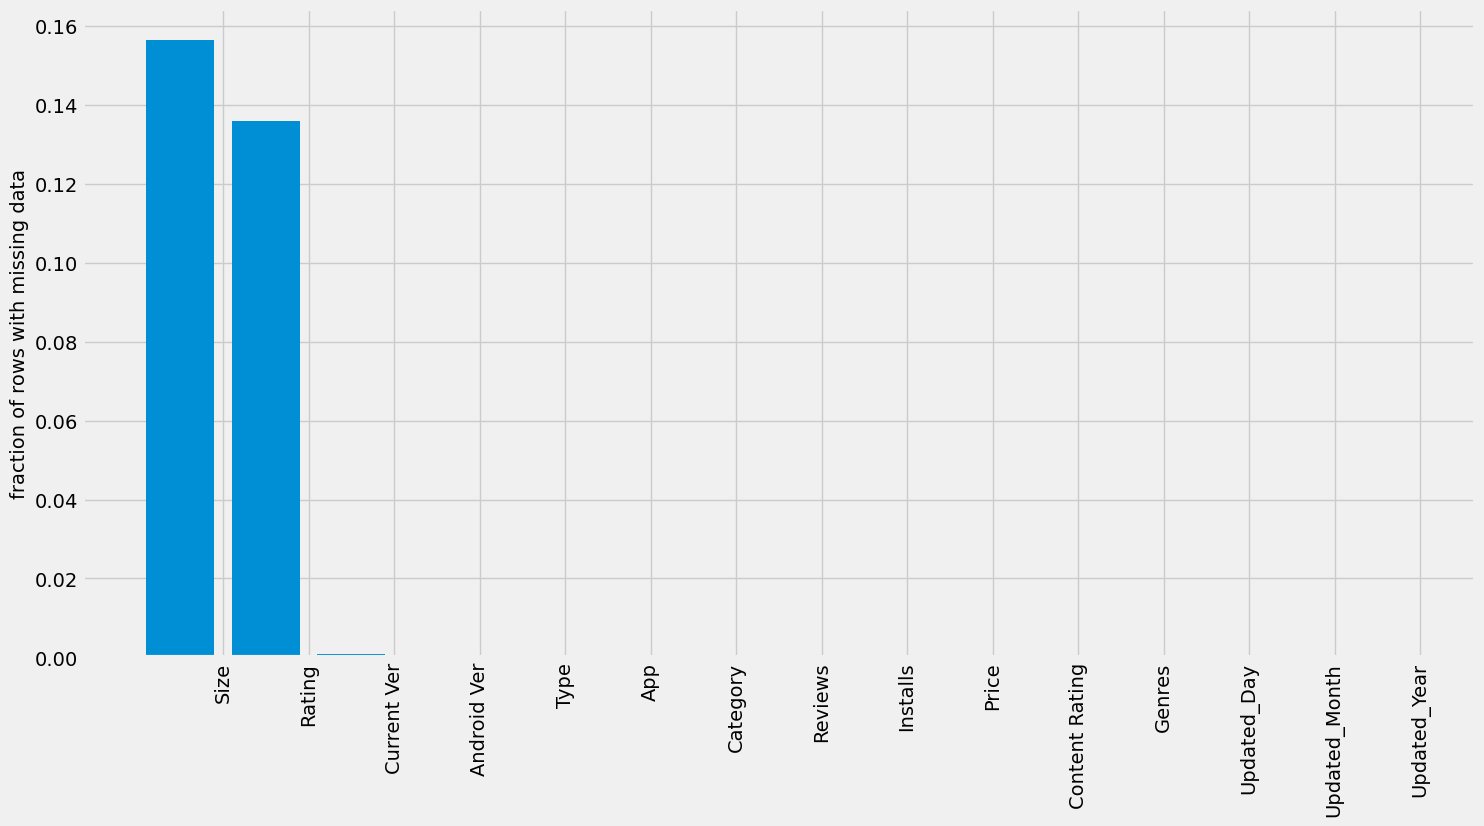

In [32]:
null_counts = data.isna().sum().sort_values(ascending=False)/len(data)
plt.figure(figsize=(16,8))
plt.xticks(np.arange(len(null_counts))+0.5,null_counts.index,rotation='vertical')
plt.ylabel('fraction of rows with missing data')
plt.bar(np.arange(len(null_counts)),null_counts)

In [33]:
### lets create a function so that I can easily do it for all features
def Random_value_imputation(feature):
    random_sample=data[feature].dropna().sample(data[feature].isnull().sum())               
    random_sample.index=data[data[feature].isnull()].index
    data.loc[data[feature].isnull(),feature]=random_sample

In [34]:
for col in data:
    Random_value_imputation(col)

In [35]:
null = pd.DataFrame({'Null Values' : data.isna().sum().sort_values(ascending=False), 'Percentage Null Values' : (data.isna().sum().sort_values(ascending=False)) / (data.shape[0]) * (100)})
null

,Null Values,Percentage Null Values
App,0,0.0
Category,0,0.0
Rating,0,0.0
Reviews,0,0.0
Size,0,0.0
Installs,0,0.0
Type,0,0.0
Price,0,0.0
Content Rating,0,0.0
Genres,0,0.0


<BarContainer object of 15 artists>

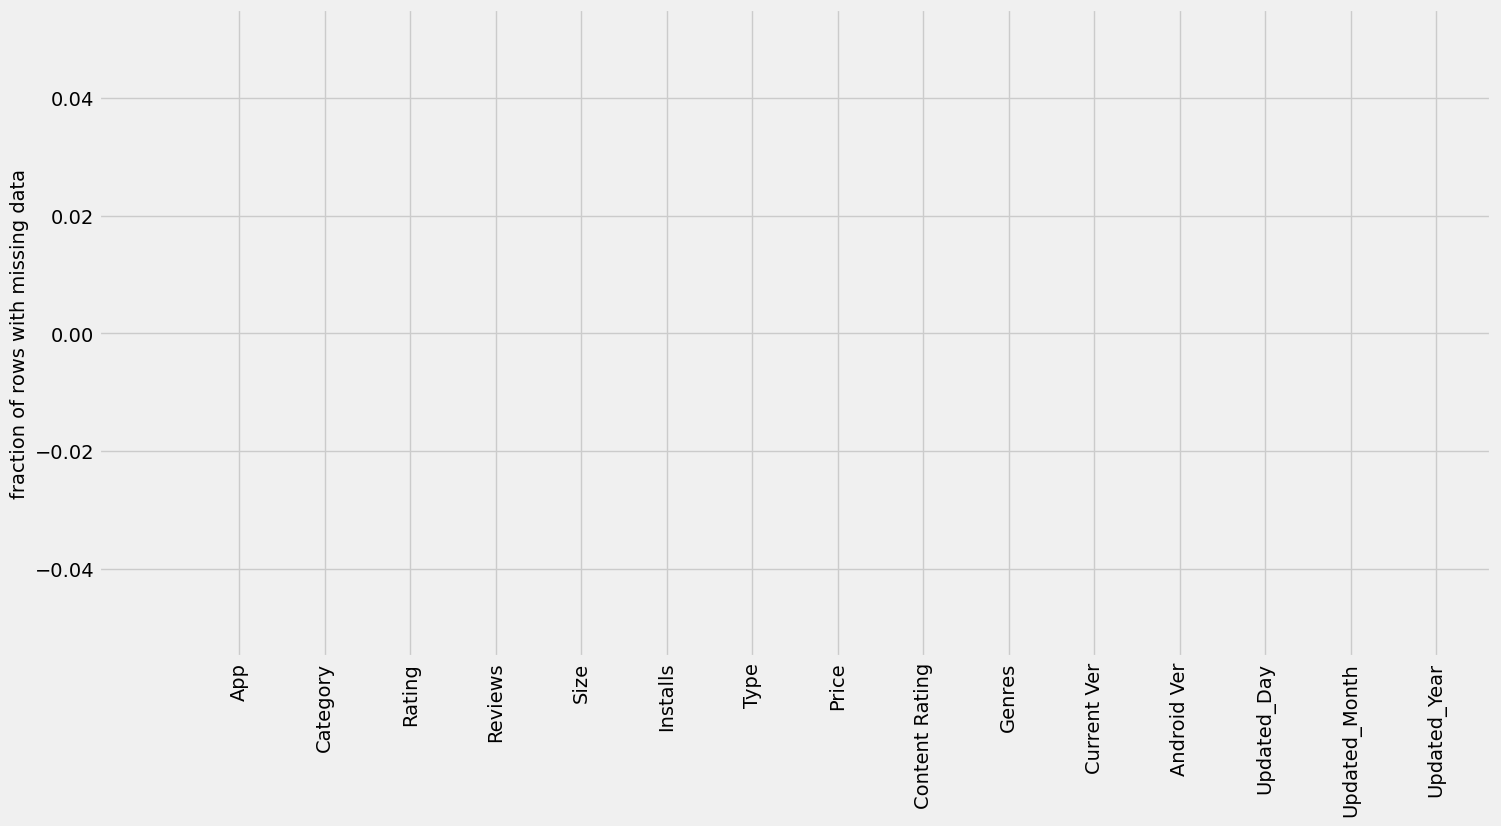

In [36]:
null_counts = data.isna().sum().sort_values(ascending=False)/len(data)
plt.figure(figsize=(16,8))
plt.xticks(np.arange(len(null_counts))+0.5,null_counts.index,rotation='vertical')
plt.ylabel('fraction of rows with missing data')
plt.bar(np.arange(len(null_counts)),null_counts)

In [37]:
duplicate = data.duplicated()
print(duplicate.sum())

306


In [38]:
data.drop_duplicates(inplace=True)

In [39]:
duplicate = data.duplicated()
print(duplicate.sum())

0


In [40]:
num_features=[col for col in data.columns if data[col].dtype!='O']
num_features

['Rating',
 'Reviews',
 'Size',
 'Installs',
 'Price',
 'Updated_Day',
 'Updated_Month',
 'Updated_Year']

In [41]:
num_data = data[num_features]
num_data.head()

,Rating,Reviews,Size,Installs,Price,Updated_Day,Updated_Month,Updated_Year
0,4.1,159,19.0,10000,0.0,7,1,2018
1,3.9,967,14.0,500000,0.0,15,1,2018
2,4.7,87510,8.7,5000000,0.0,1,8,2018
3,4.5,215644,25.0,50000000,0.0,8,6,2018
4,4.3,967,2.8,100000,0.0,20,6,2018


In [42]:
cat_features=[col for col in data.columns if data[col].dtype=='O']
cat_features

['App',
 'Category',
 'Type',
 'Content Rating',
 'Genres',
 'Current Ver',
 'Android Ver']

In [43]:
categorical=data[cat_features]
categorical.head()

,App,Category,Type,Content Rating,Genres,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,Free,Everyone,Art & Design,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,Free,Everyone,Art & Design;Pretend Play,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,Free,Everyone,Art & Design,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,Free,Teen,Art & Design,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,Free,Everyone,Art & Design;Creativity,1.1,4.4 and up


In [44]:
def outlier_thresholds(dataframe, variable):
    quartile1 = dataframe[variable].quantile(0.10)
    quartile3 = dataframe[variable].quantile(0.90)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

In [45]:
def has_outliers(dataframe, variable):
    low_limit, up_limit = outlier_thresholds(dataframe, variable)
    if dataframe[(dataframe[variable] < low_limit) | (dataframe[variable] > up_limit)].any(axis=None):
        print(variable, "yes")
    print(variable, "no")

In [46]:
for col in num_data.columns:
    has_outliers(num_data, col)

Rating yes
Rating no
Reviews yes
Reviews no
Size no
Installs yes
Installs no
Price yes
Price no
Updated_Day no
Updated_Month no
Updated_Year yes
Updated_Year no


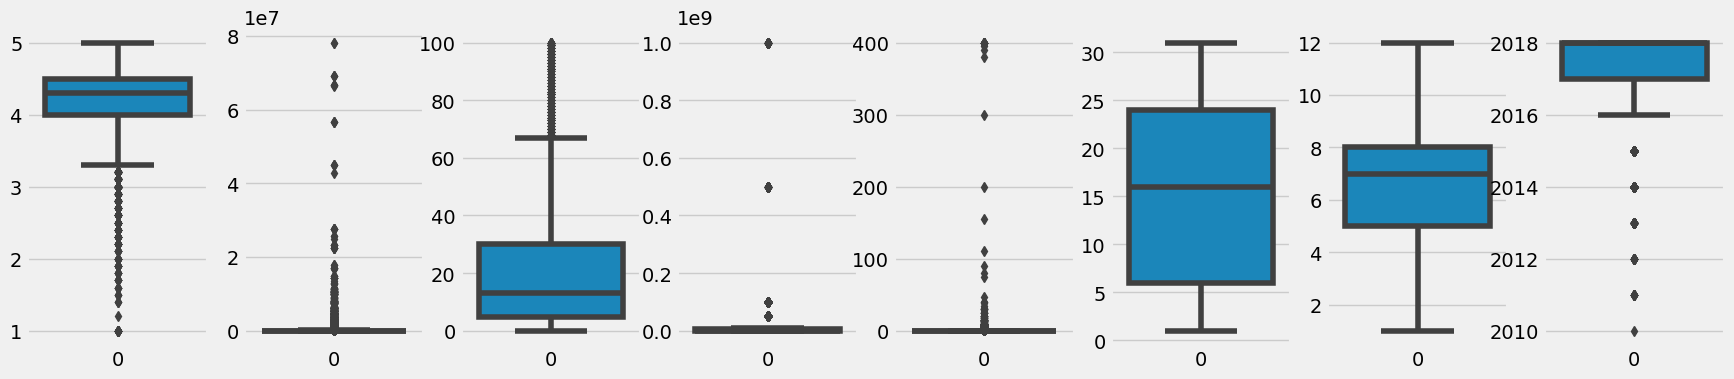

In [47]:
plt.figure(figsize=(22,18))
for i,col in enumerate(num_data.columns):
    plt.subplot(4,9,i+1)
    sns.boxplot(num_data[col])

In [48]:
## function to get ride of qutliers
def replace_with_thresholds(dataframe, numeric_columns):
    for variable in numeric_columns:
        low_limit, up_limit = outlier_thresholds(dataframe, variable)
        dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
        dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit

In [50]:
replace_with_thresholds(num_data, num_data.columns)

In [51]:
for col in num_data.columns:
    has_outliers(num_data, col)

Rating no
Reviews no
Size no
Installs no
Price no
Updated_Day no
Updated_Month no
Updated_Year no


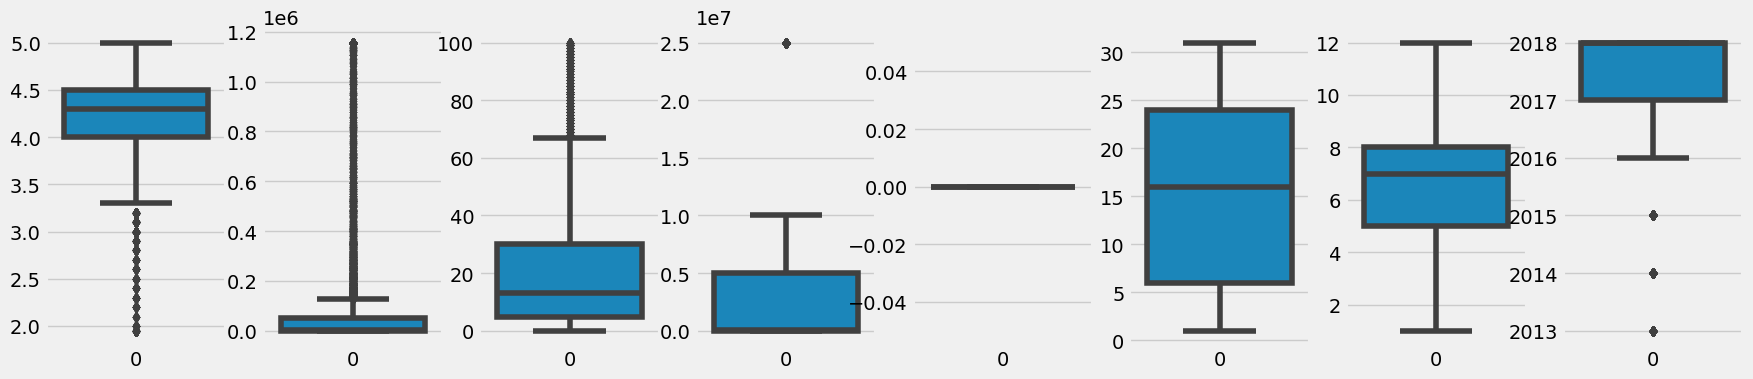

In [52]:
plt.figure(figsize=(22,18))
for i,col in enumerate(num_data.columns):
    plt.subplot(4,9,i+1)
    sns.boxplot(num_data[col])

In [53]:
categorical['Category'].value_counts()

FAMILY                 1946
GAME                   1129
TOOLS                   843
BUSINESS                439
PRODUCTIVITY            420
MEDICAL                 415
PERSONALIZATION         391
COMMUNICATION           382
LIFESTYLE               375
SPORTS                  369
FINANCE                 363
PHOTOGRAPHY             324
HEALTH_AND_FITNESS      317
SOCIAL                  288
NEWS_AND_MAGAZINES      276
TRAVEL_AND_LOCAL        245
SHOPPING                240
BOOKS_AND_REFERENCE     230
DATING                  202
VIDEO_PLAYERS           175
EDUCATION               141
MAPS_AND_NAVIGATION     137
ENTERTAINMENT           126
FOOD_AND_DRINK          125
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       85
HOUSE_AND_HOME           82
WEATHER                  82
ART_AND_DESIGN           65
EVENTS                   64
PARENTING                60
COMICS                   60
BEAUTY                   53
Name: Category, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]),
 [Text(0, 0, 'ART_AND_DESIGN'),
  Text(1, 0, 'AUTO_AND_VEHICLES'),
  Text(2, 0, 'BEAUTY'),
  Text(3, 0, 'BOOKS_AND_REFERENCE'),
  Text(4, 0, 'BUSINESS'),
  Text(5, 0, 'COMICS'),
  Text(6, 0, 'COMMUNICATION'),
  Text(7, 0, 'DATING'),
  Text(8, 0, 'EDUCATION'),
  Text(9, 0, 'ENTERTAINMENT'),
  Text(10, 0, 'EVENTS'),
  Text(11, 0, 'FINANCE'),
  Text(12, 0, 'FOOD_AND_DRINK'),
  Text(13, 0, 'HEALTH_AND_FITNESS'),
  Text(14, 0, 'HOUSE_AND_HOME'),
  Text(15, 0, 'LIBRARIES_AND_DEMO'),
  Text(16, 0, 'LIFESTYLE'),
  Text(17, 0, 'GAME'),
  Text(18, 0, 'FAMILY'),
  Text(19, 0, 'MEDICAL'),
  Text(20, 0, 'SOCIAL'),
  Text(21, 0, 'SHOPPING'),
  Text(22, 0, 'PHOTOGRAPHY'),
  Text(23, 0, 'SPORTS'),
  Text(24, 0, 'TRAVEL_AND_LOCAL'),
  Text(25, 0, 'TOOLS'),
  Text(26, 0, 'PERSONALIZATION'),
  Text(27, 0, 'PRODUCTIVITY'),
  Text(28, 0, 'PARENTING'),
  Text(

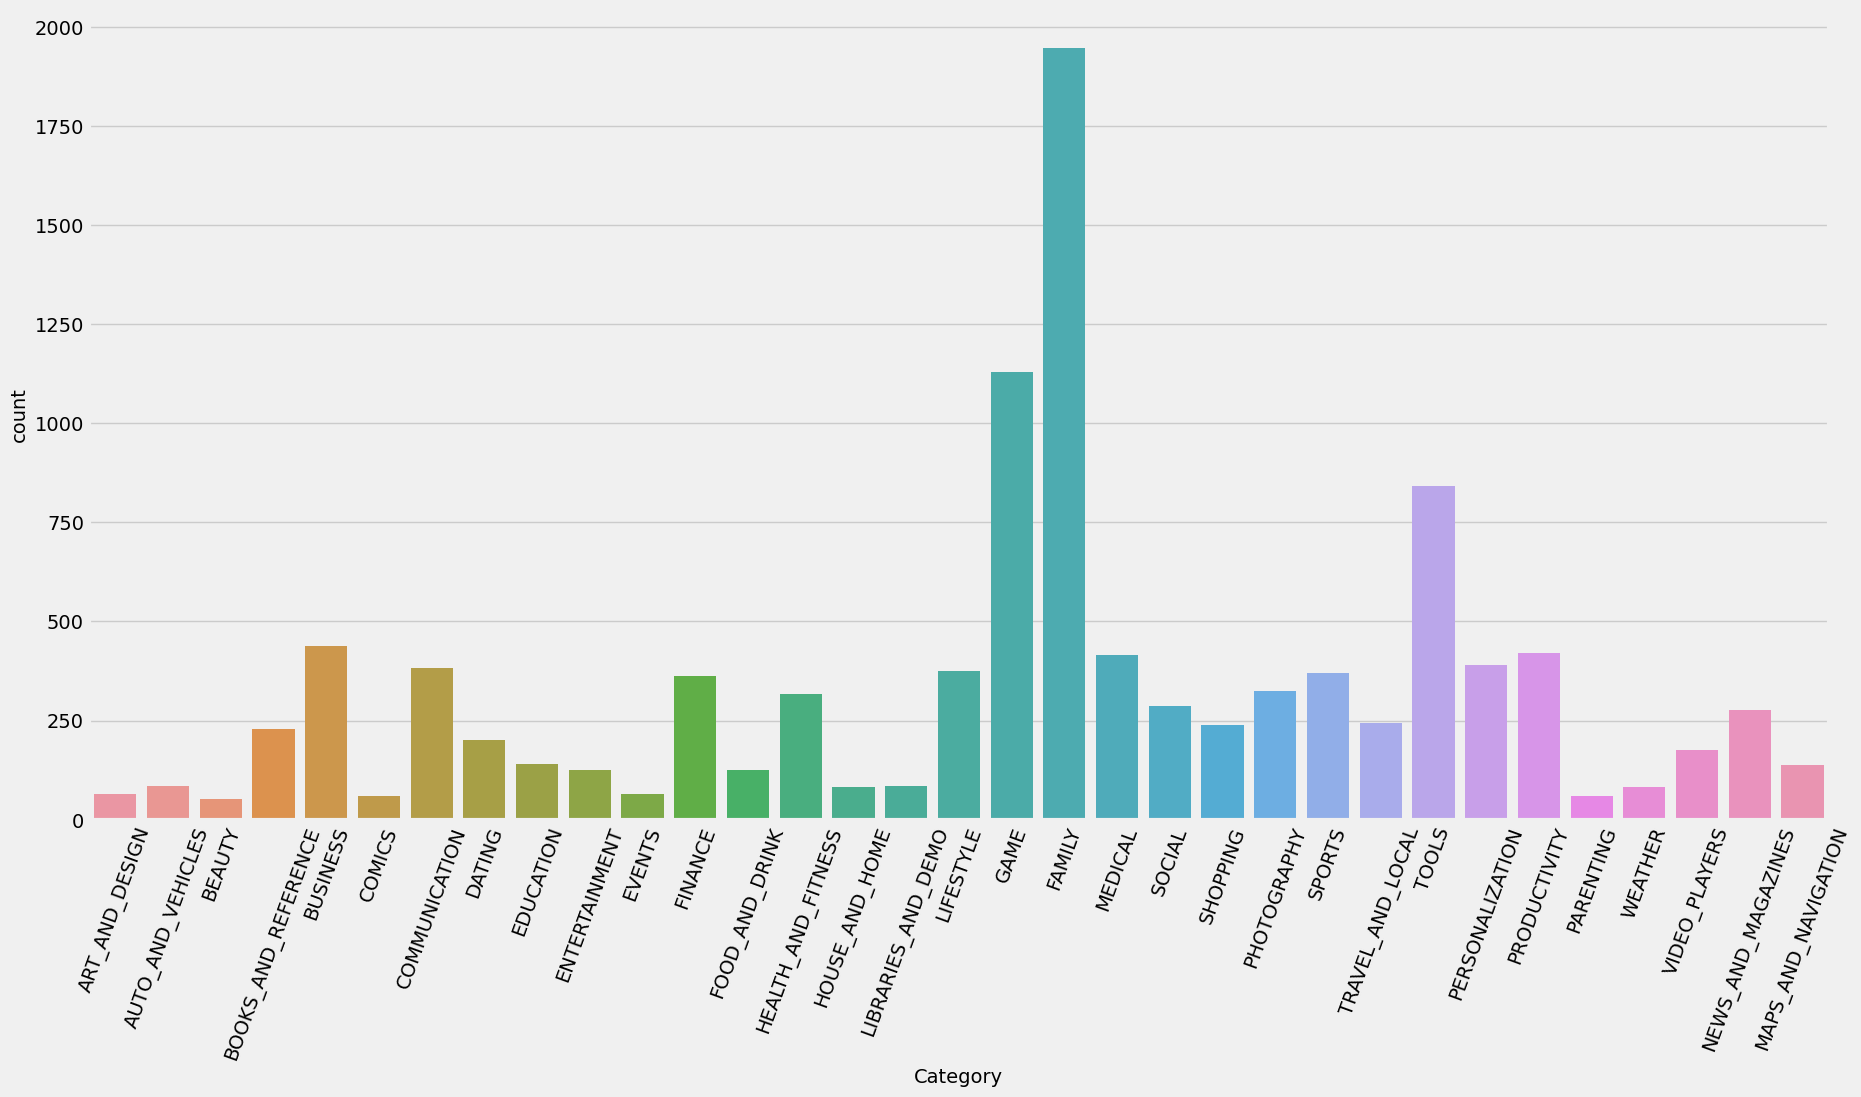

In [54]:
plt.rcParams['figure.figsize'] = (20, 10)
sns.countplot(x='Category',data=data)
plt.xticks(rotation=70)

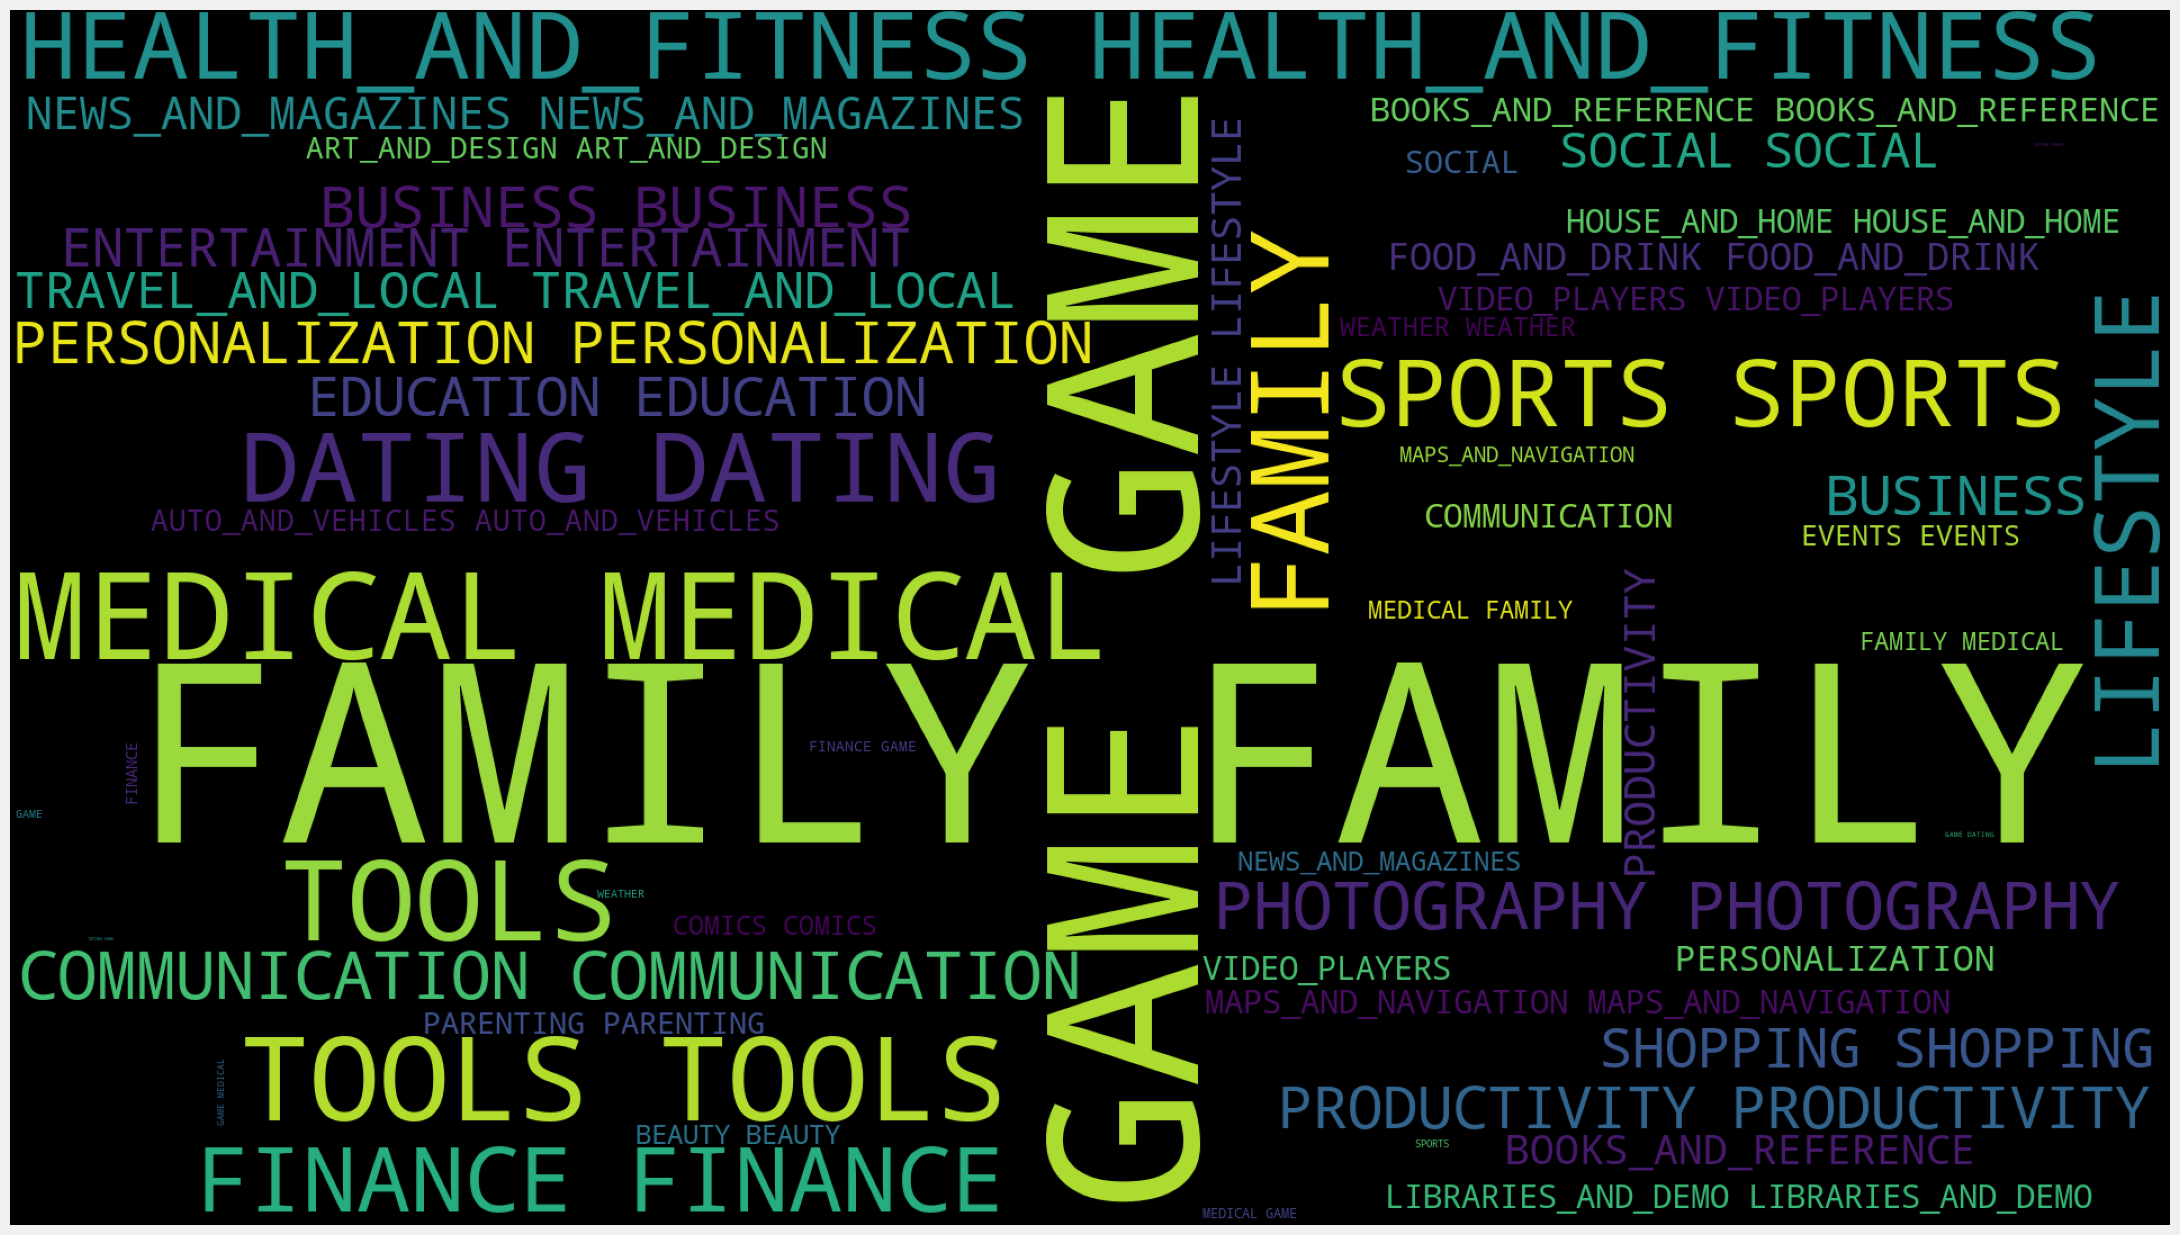

In [55]:
plt.subplots(figsize=(25,15))
wordcloud = WordCloud(
                          background_color='black',
                          width=1920,
                          height=1080
                         ).generate(" ".join(data.Category))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]),
 [Text(0, 0, 'PRODUCTIVITY'),
  Text(1, 0, 'PHOTOGRAPHY'),
  Text(2, 0, 'NEWS_AND_MAGAZINES'),
  Text(3, 0, 'FAMILY'),
  Text(4, 0, 'LIFESTYLE'),
  Text(5, 0, 'MEDICAL'),
  Text(6, 0, 'BUSINESS'),
  Text(7, 0, 'PERSONALIZATION'),
  Text(8, 0, 'FINANCE'),
  Text(9, 0, 'TOOLS'),
  Text(10, 0, 'SHOPPING'),
  Text(11, 0, 'GAME'),
  Text(12, 0, 'TRAVEL_AND_LOCAL'),
  Text(13, 0, 'EVENTS'),
  Text(14, 0, 'HEALTH_AND_FITNESS'),
  Text(15, 0, 'COMICS'),
  Text(16, 0, 'BOOKS_AND_REFERENCE'),
  Text(17, 0, 'SOCIAL'),
  Text(18, 0, 'SPORTS'),
  Text(19, 0, 'COMMUNICATION'),
  Text(20, 0, 'DATING'),
  Text(21, 0, 'FOOD_AND_DRINK'),
  Text(22, 0, 'ART_AND_DESIGN'),
  Text(23, 0, 'LIBRARIES_AND_DEMO'),
  Text(24, 0, 'PARENTING'),
  Text(25, 0, 'MAPS_AND_NAVIGATION'),
  Text(26, 0, 'AUTO_AND_VEHICLES'),
  Text(27, 0, 'EDUCATION'),
  Text(28, 0, 'HOUSE_A

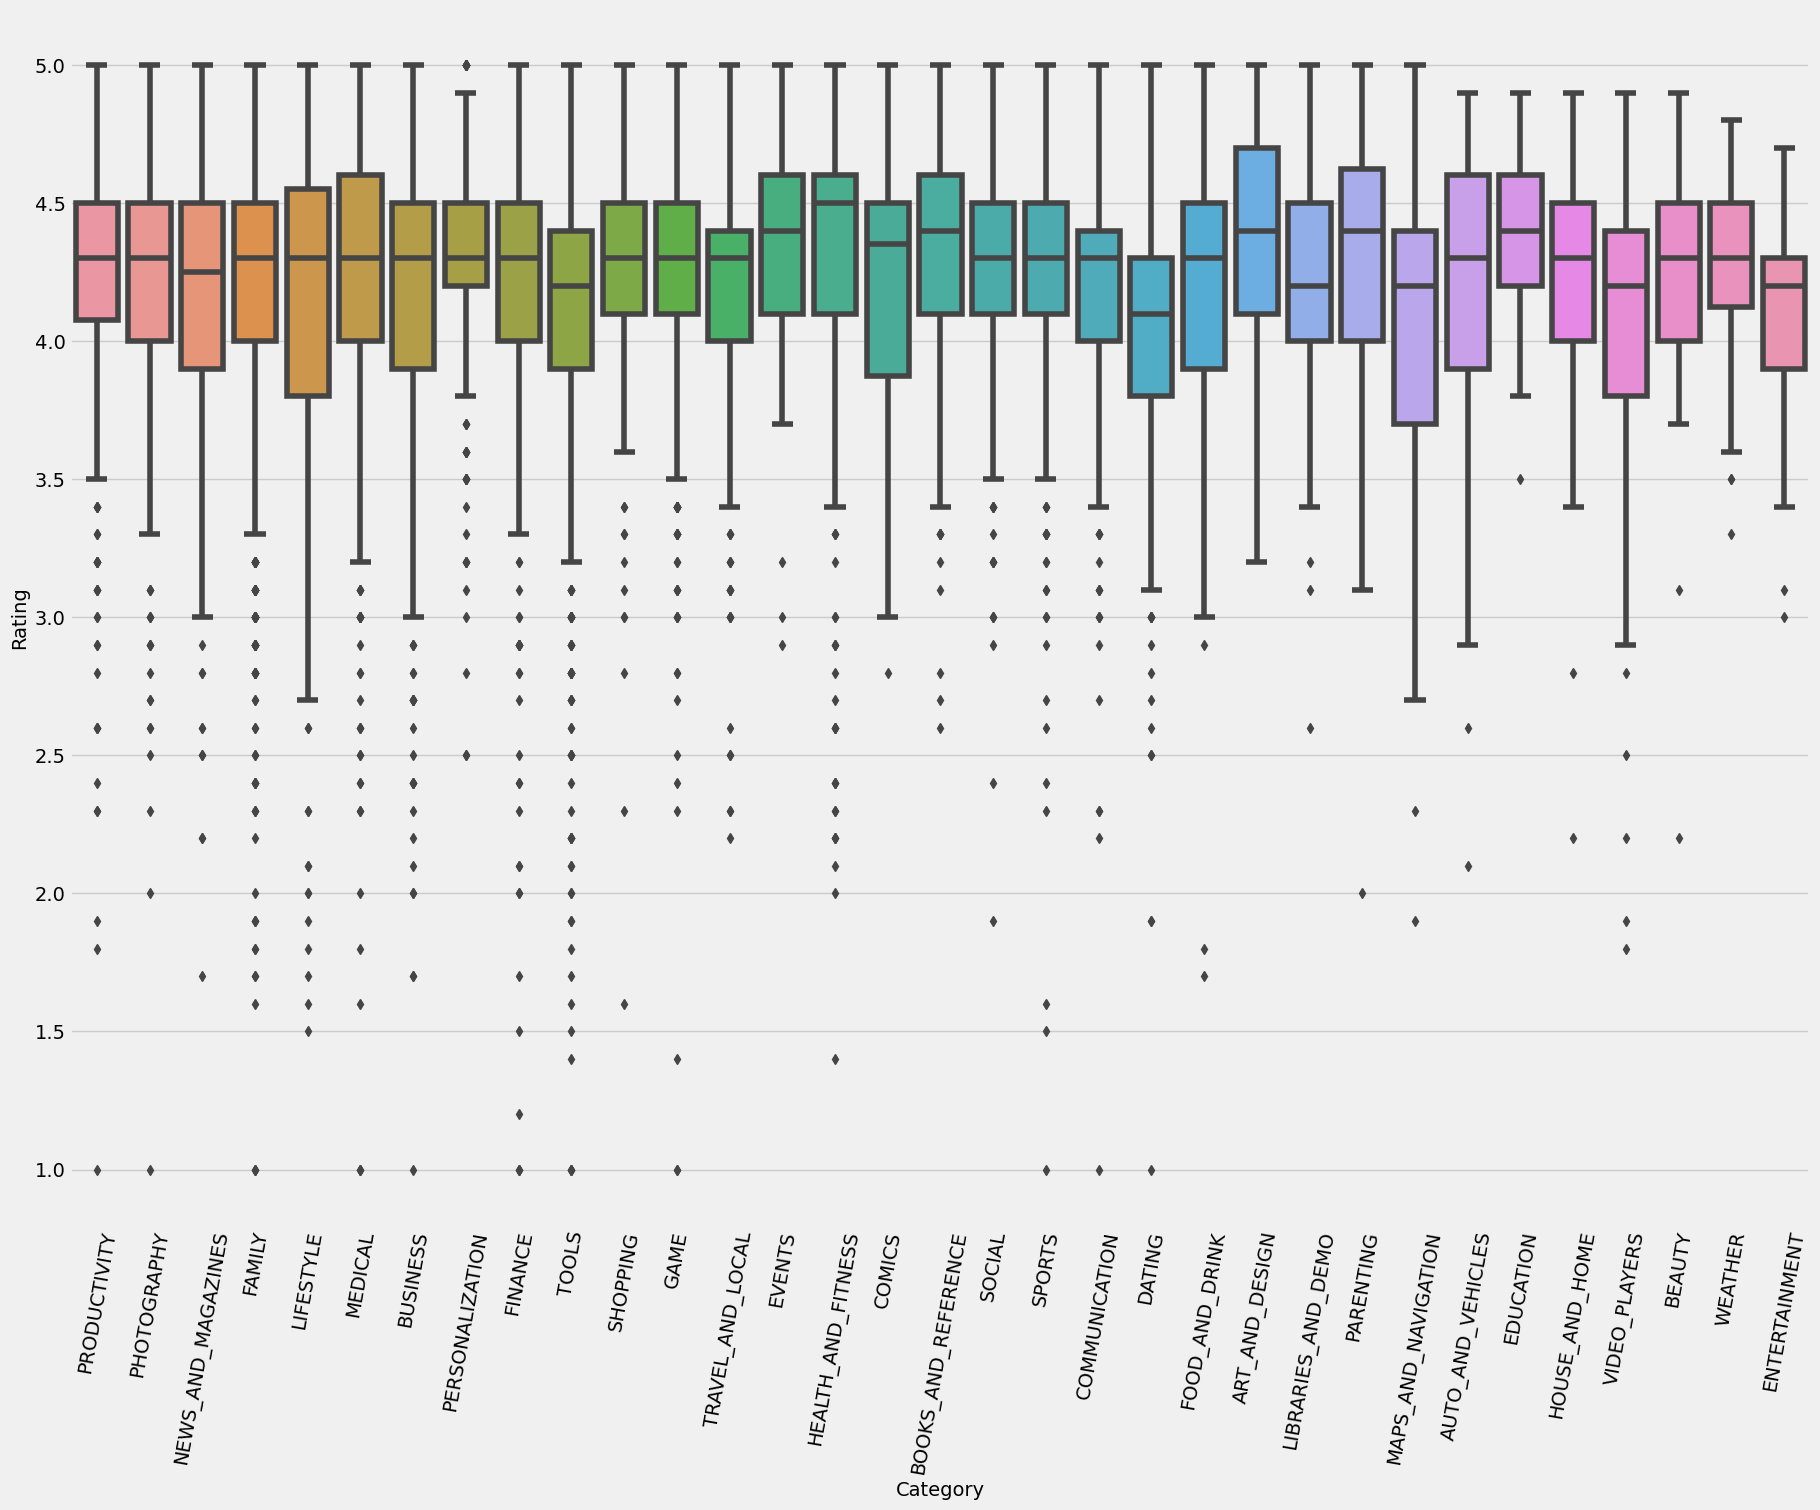

In [58]:
plt.figure(figsize=(20,15))
sns.boxplot(y='Rating',x='Category',data = data.sort_values('Rating',ascending=False))
plt.xticks(rotation=80)

In [59]:
categorical['Type'].value_counts()

Free    9766
Paid     768
Name: Type, dtype: int64

(array([0, 1]), [Text(0, 0, 'Free'), Text(1, 0, 'Paid')])

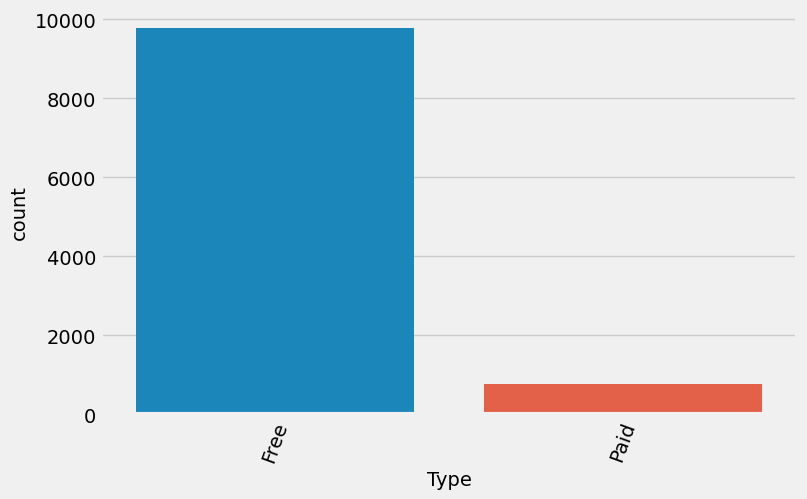

In [60]:
plt.rcParams['figure.figsize'] = (8,5)
sns.countplot(x='Type',data=data)
plt.xticks(rotation=70)

<Axes: ylabel='Type'>

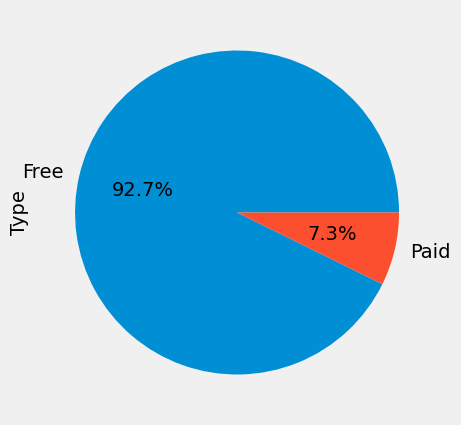

In [61]:
data["Type"].value_counts().plot.pie(autopct = "%1.1f%%")

<Figure size 1500x800 with 0 Axes>

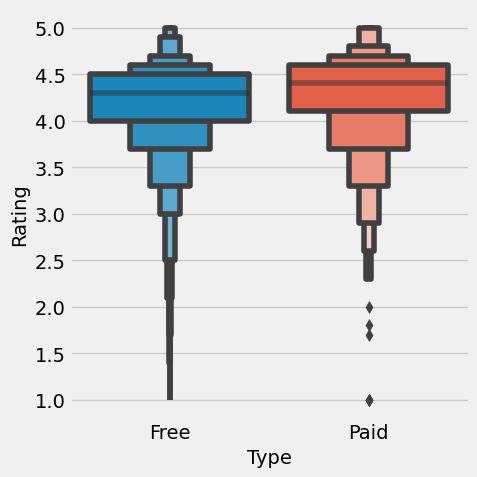

In [62]:
plt.figure(figsize=(15,8))
sns.catplot(y='Rating',x='Type',data = data.sort_values('Rating',ascending=False),kind='boxen')

In [63]:
categorical['Content Rating'].value_counts()

Everyone           8499
Teen               1172
Mature 17+          463
Everyone 10+        395
Adults only 18+       3
Unrated               2
Name: Content Rating, dtype: int64

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Everyone'),
  Text(1, 0, 'Teen'),
  Text(2, 0, 'Everyone 10+'),
  Text(3, 0, 'Mature 17+'),
  Text(4, 0, 'Adults only 18+'),
  Text(5, 0, 'Unrated')])

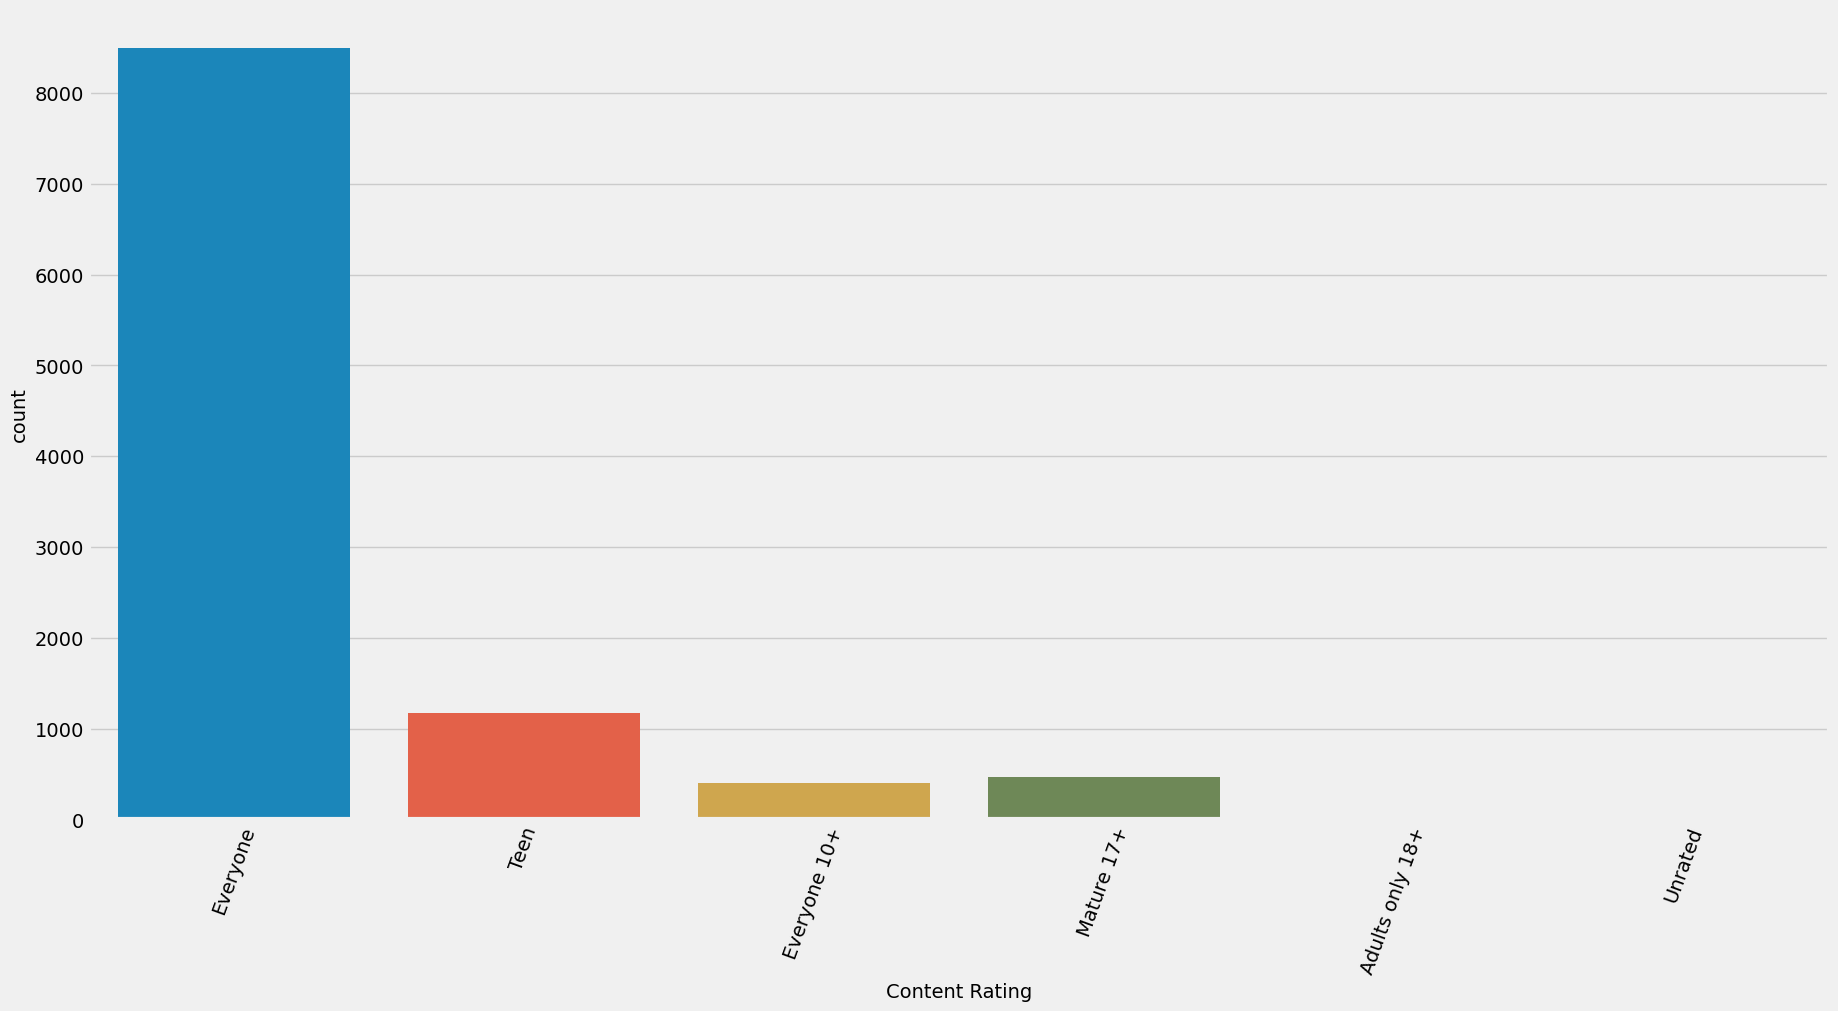

In [64]:
plt.rcParams['figure.figsize'] = (20, 10)
sns.countplot(x='Content Rating',data=data)
plt.xticks(rotation=70)

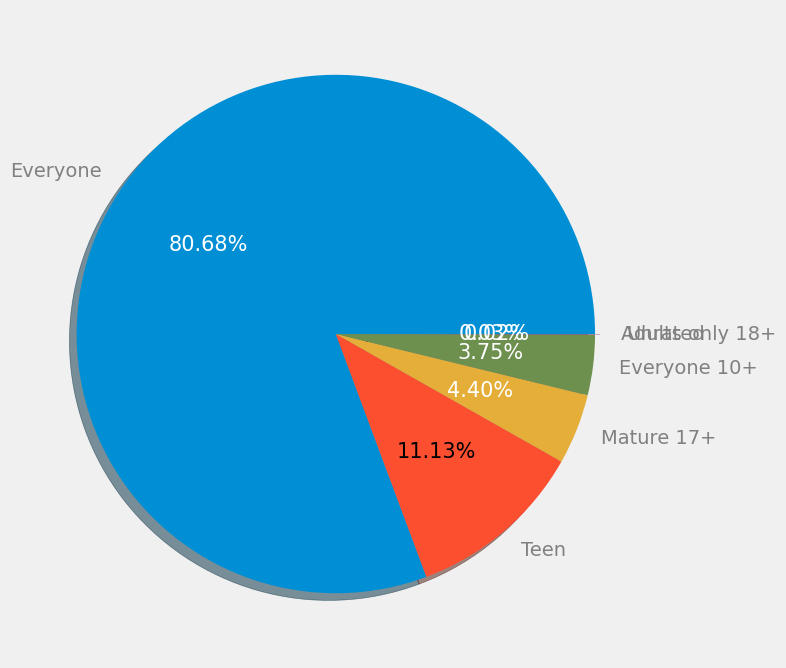

In [65]:
# pie chart
values = data['Content Rating'].value_counts()
labels = ['Everyone', 'Teen', 'Mature 17+','Everyone 10+','Adults only 18+','Unrated']

fig, ax = plt.subplots(figsize = (12, 8), dpi = 100)
explode = (0,0,0,0,0,.02)

patches, texts, autotexts = ax.pie(values, labels = labels, autopct = '%1.2f%%', shadow = True,
                                   startangle = 0, explode = explode)

plt.setp(texts, color = 'grey')
plt.setp(autotexts, size = 15, color = 'white')
autotexts[1].set_color('black')
plt.show()

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Everyone'),
  Text(1, 0, 'Teen'),
  Text(2, 0, 'Everyone 10+'),
  Text(3, 0, 'Mature 17+'),
  Text(4, 0, 'Adults only 18+'),
  Text(5, 0, 'Unrated')])

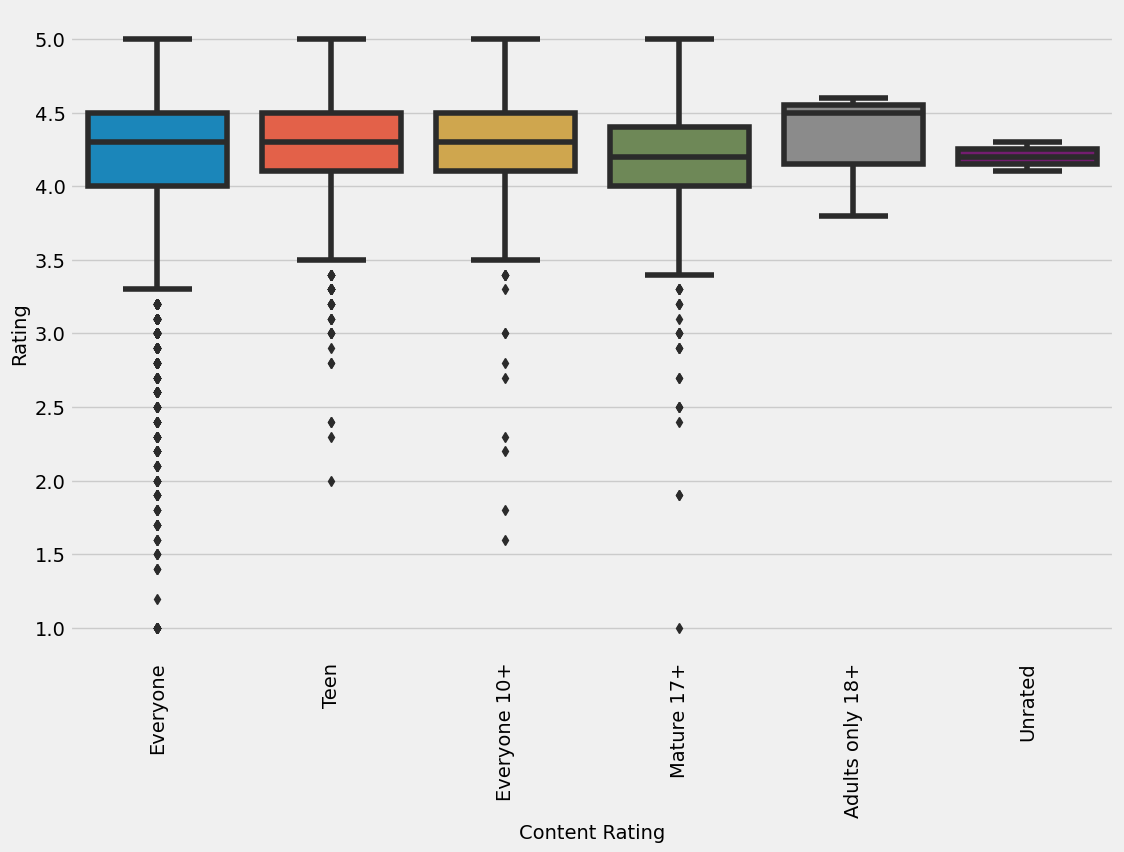

In [66]:
plt.figure(figsize=(12,8))
sns.boxplot(y='Rating',x='Content Rating',data = data.sort_values('Rating',ascending=False))
plt.xticks(rotation=90)

<Axes: xlabel='Content Rating', ylabel='Installs'>

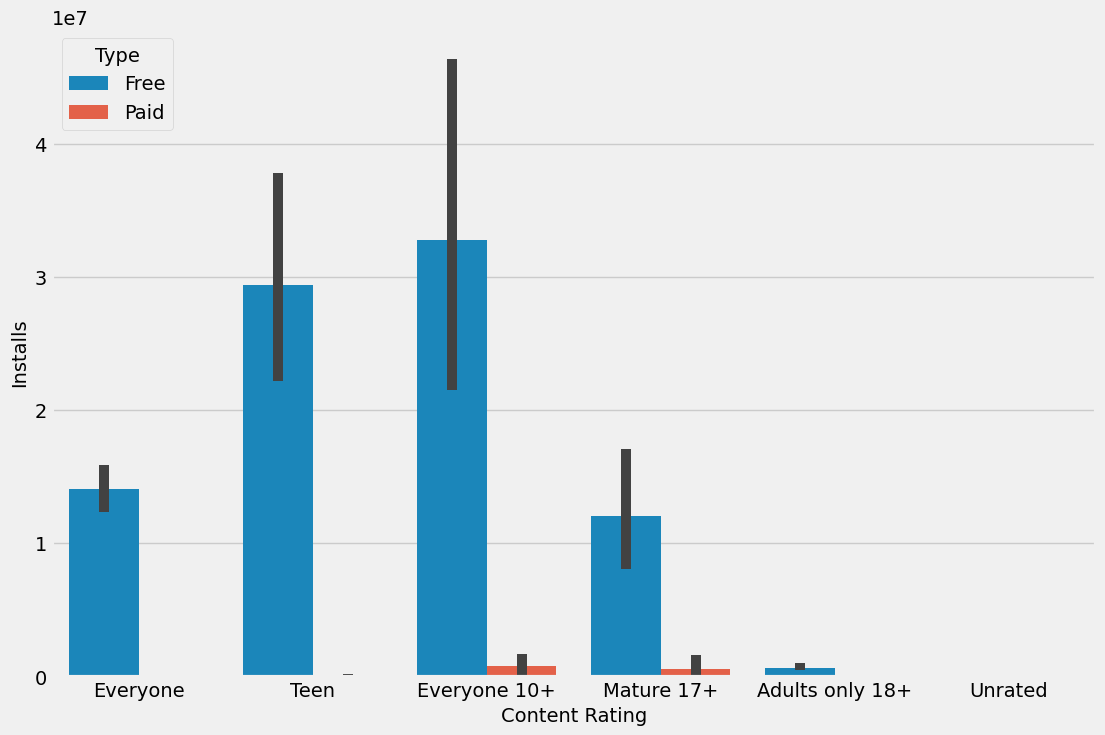

In [67]:
plt.figure(figsize=(12,8))
sns.barplot(x="Content Rating", y="Installs", hue="Type", data=data)

In [68]:
categorical['Genres'].value_counts()

Tools                                842
Entertainment                        603
Education                            536
Business                             439
Productivity                         420
                                    ... 
Parenting;Brain Games                  1
Travel & Local;Action & Adventure      1
Lifestyle;Pretend Play                 1
Tools;Education                        1
Strategy;Creativity                    1
Name: Genres, Length: 119, dtype: int64

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118]),
 [Text(0, 0, 'Art & Design'),
  Text(1, 0, 'Art & Design;Pretend Play'),
  Text(2, 0, 'Art & Design;Creativity'),
  Text(3, 0, 'Art & Design;Action & Adventure'),
  Text(4, 0, 'Auto & Vehicles'),
  Text(5, 0, 'Beauty'),
  Text(6, 0, 'Books & Reference'),
  Text(7, 0, 'Business'),
  Text(8, 0, 'Comics'),
  Text(9, 0, 'Comi

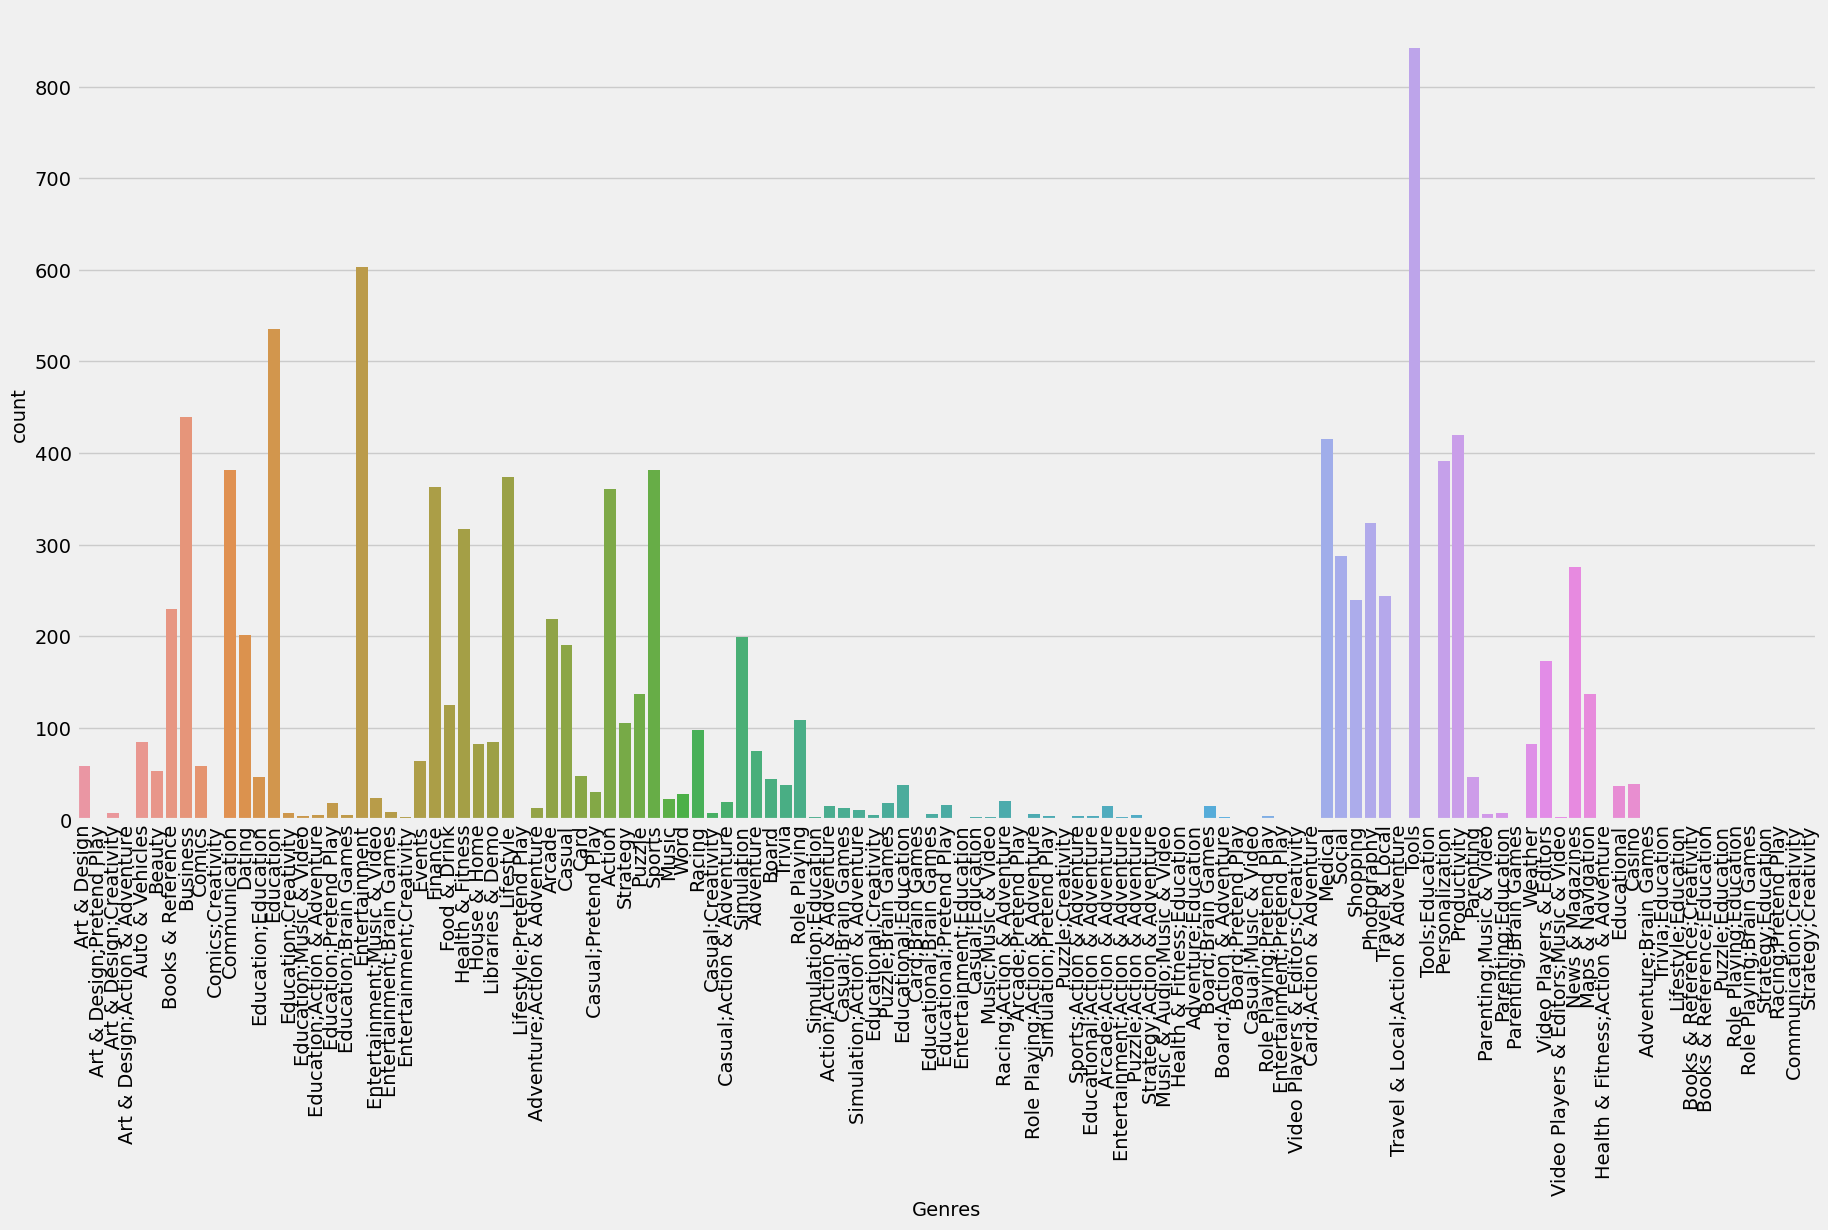

In [69]:
plt.rcParams['figure.figsize'] = (20, 10)
sns.countplot(x='Genres',data=data)
plt.xticks(rotation=90)

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118]),
 [Text(0, 0, 'Productivity'),
  Text(1, 0, 'Photography'),
  Text(2, 0, 'News & Magazines'),
  Text(3, 0, 'Puzzle'),
  Text(4, 0, 'Lifestyle'),
  Text(5, 0, 'Medical'),
  Text(6, 0, 'Education'),
  Text(7, 0, 'Business'),
  Text(8, 0, 'Personalization'),
  Text(9, 0, 'Finance'),
  Text(10, 0, 'Entertainment'),
  Text(11, 

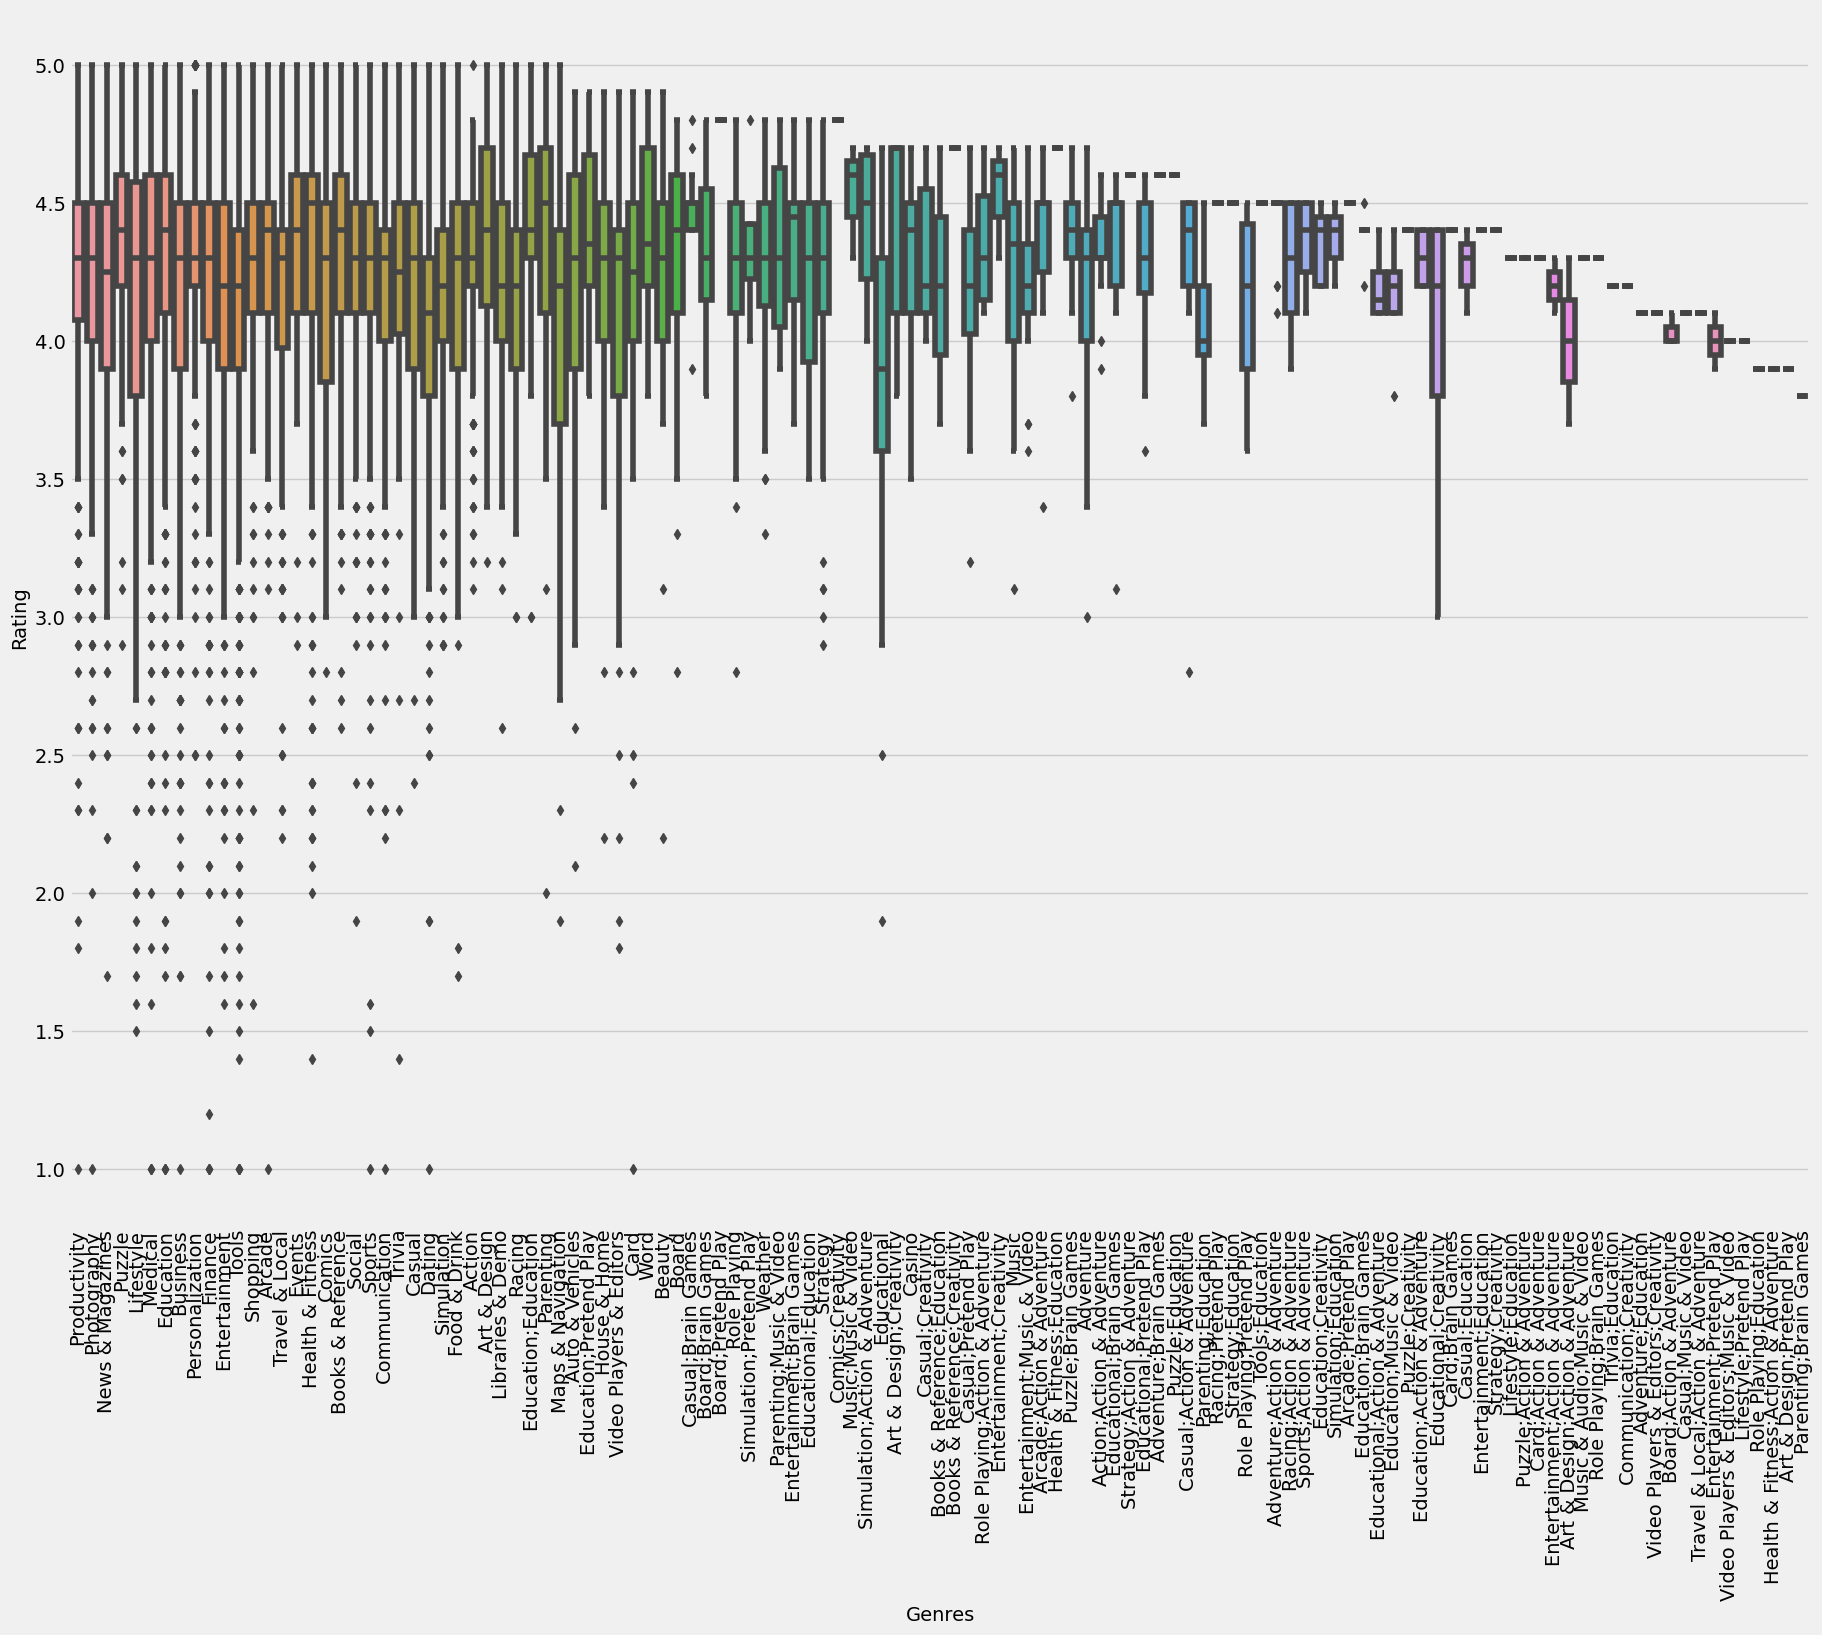

In [70]:
plt.figure(figsize=(20,15))
sns.boxplot(y='Rating',x='Genres',data = data.sort_values('Rating',ascending=False))
plt.xticks(rotation=90)

In [71]:
categorical['Current Ver'].value_counts()

Varies with device    1457
1.0                    802
1.1                    260
1.2                    178
2.0                    149
                      ... 
12.2.7.3671              1
8.50.935520              1
1.8.4.5                  1
2.9.10                   1
2.0.148.0                1
Name: Current Ver, Length: 2831, dtype: int64

In [72]:
categorical['Android Ver'].value_counts()

4.1 and up            2386
4.0.3 and up          1459
Varies with device    1359
4.0 and up            1340
4.4 and up             905
2.3 and up             644
5.0 and up             557
4.2 and up             387
2.3.3 and up           279
2.2 and up             239
3.0 and up             237
4.3 and up             235
2.1 and up             133
1.6 and up             116
6.0 and up              58
7.0 and up              42
3.2 and up              36
2.0 and up              32
5.1 and up              22
1.5 and up              20
4.4W and up             11
3.1 and up              10
2.0.1 and up             7
8.0 and up               6
7.1 and up               3
4.0.3 - 7.1.1            2
5.0 - 8.0                2
1.0 and up               2
7.0 - 7.1.1              1
4.1 - 7.1.1              1
5.0 - 6.0                1
2.2 - 7.1.1              1
5.0 - 7.1.1              1
Name: Android Ver, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]),
 [Text(0, 0, '4.0.3 and up'),
  Text(1, 0, '4.2 and up'),
  Text(2, 0, '4.4 and up'),
  Text(3, 0, '2.3 and up'),
  Text(4, 0, '3.0 and up'),
  Text(5, 0, '4.1 and up'),
  Text(6, 0, '4.0 and up'),
  Text(7, 0, '2.3.3 and up'),
  Text(8, 0, 'Varies with device'),
  Text(9, 0, '2.2 and up'),
  Text(10, 0, '5.0 and up'),
  Text(11, 0, '6.0 and up'),
  Text(12, 0, '1.6 and up'),
  Text(13, 0, '1.5 and up'),
  Text(14, 0, '2.1 and up'),
  Text(15, 0, '7.0 and up'),
  Text(16, 0, '5.1 and up'),
  Text(17, 0, '4.3 and up'),
  Text(18, 0, '4.0.3 - 7.1.1'),
  Text(19, 0, '2.0 and up'),
  Text(20, 0, '3.2 and up'),
  Text(21, 0, '4.4W and up'),
  Text(22, 0, '7.1 and up'),
  Text(23, 0, '7.0 - 7.1.1'),
  Text(24, 0, '8.0 and up'),
  Text(25, 0, '5.0 - 8.0'),
  Text(26, 0, '3.1 and up'),
  Text(27, 0, '2.0.1 and up'),
  Text(28, 0, '4.1 - 7.1.1'),


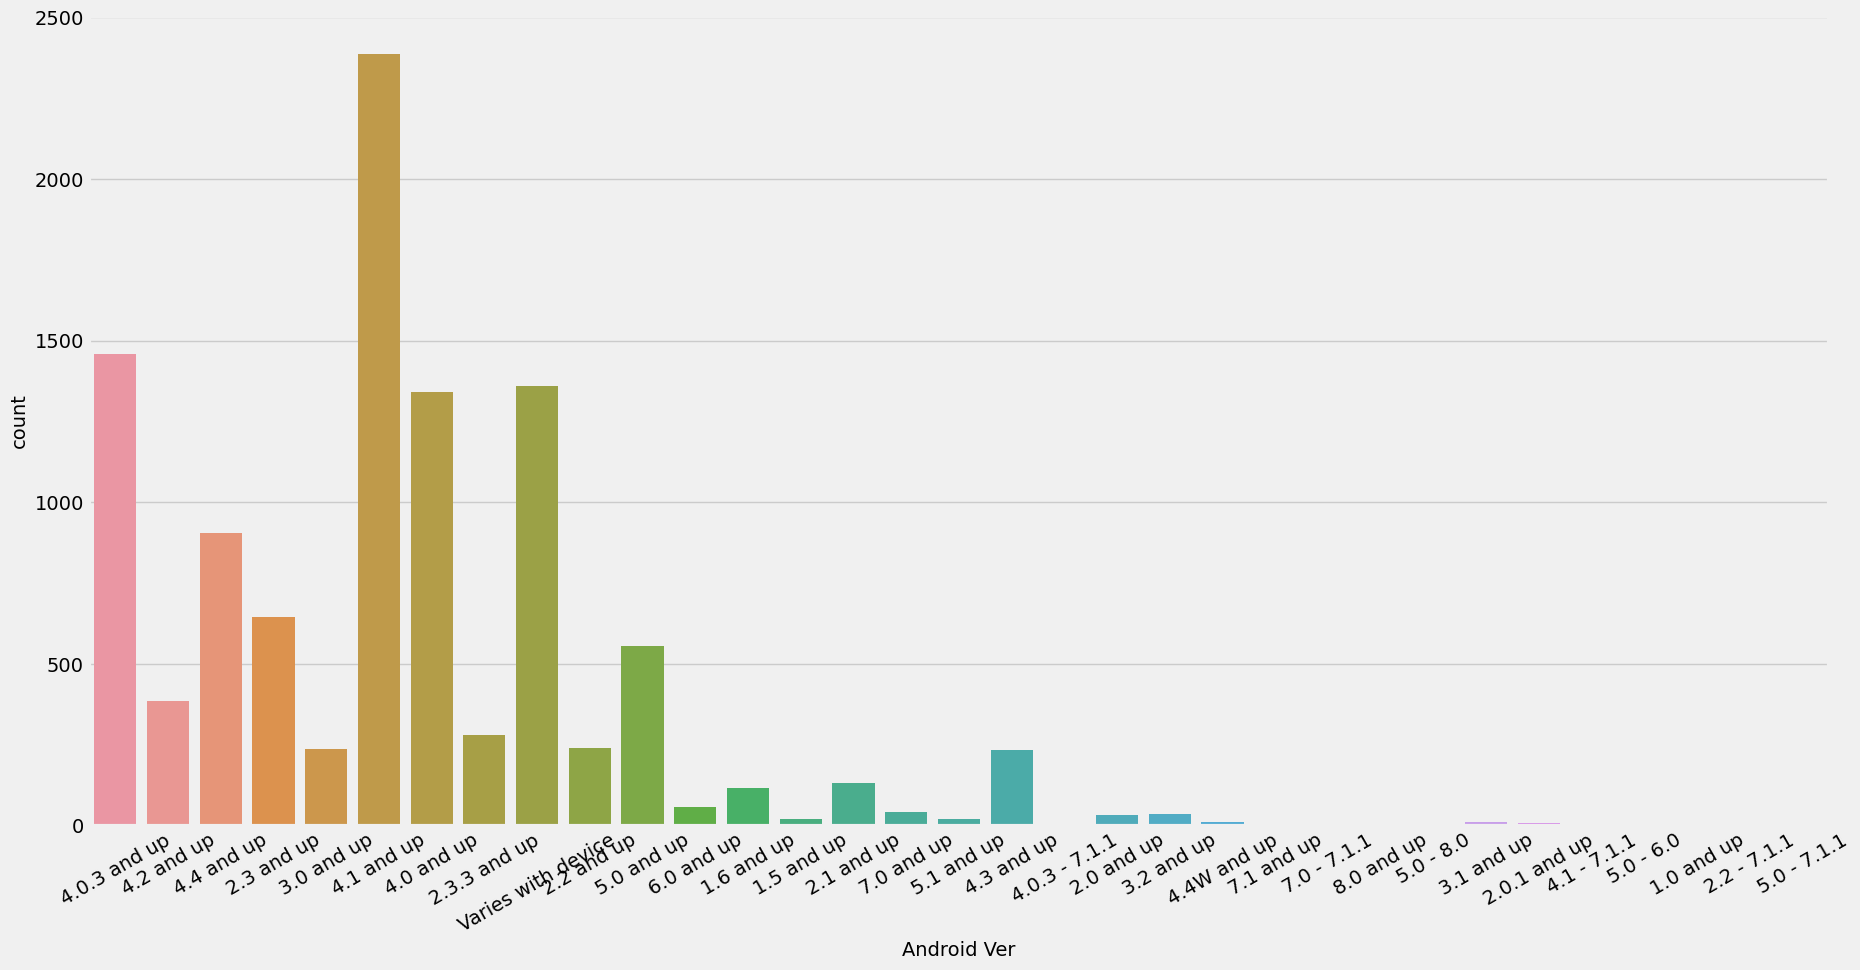

In [73]:
plt.rcParams['figure.figsize'] = (20, 10)
sns.countplot(x='Android Ver',data=data)
plt.xticks(rotation=30)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]),
 [Text(0, 0, '4.1 and up'),
  Text(1, 0, '4.2 and up'),
  Text(2, 0, '4.0 and up'),
  Text(3, 0, '4.0.3 and up'),
  Text(4, 0, '4.4 and up'),
  Text(5, 0, '2.1 and up'),
  Text(6, 0, '4.3 and up'),
  Text(7, 0, '3.0 and up'),
  Text(8, 0, '4.4W and up'),
  Text(9, 0, '2.3.3 and up'),
  Text(10, 0, '2.3 and up'),
  Text(11, 0, '5.0 and up'),
  Text(12, 0, '2.2 and up'),
  Text(13, 0, '2.0 and up'),
  Text(14, 0, '3.2 and up'),
  Text(15, 0, '1.5 and up'),
  Text(16, 0, '7.0 and up'),
  Text(17, 0, '1.6 and up'),
  Text(18, 0, 'Varies with device'),
  Text(19, 0, '8.0 and up'),
  Text(20, 0, '2.0.1 and up'),
  Text(21, 0, '5.1 and up'),
  Text(22, 0, '6.0 and up'),
  Text(23, 0, '3.1 and up'),
  Text(24, 0, '7.1 and up'),
  Text(25, 0, '5.0 - 8.0'),
  Text(26, 0, '5.0 - 6.0'),
  Text(27, 0, '2.2 - 7.1.1'),
  Text(28, 0, '1.0 and up'),
  Tex

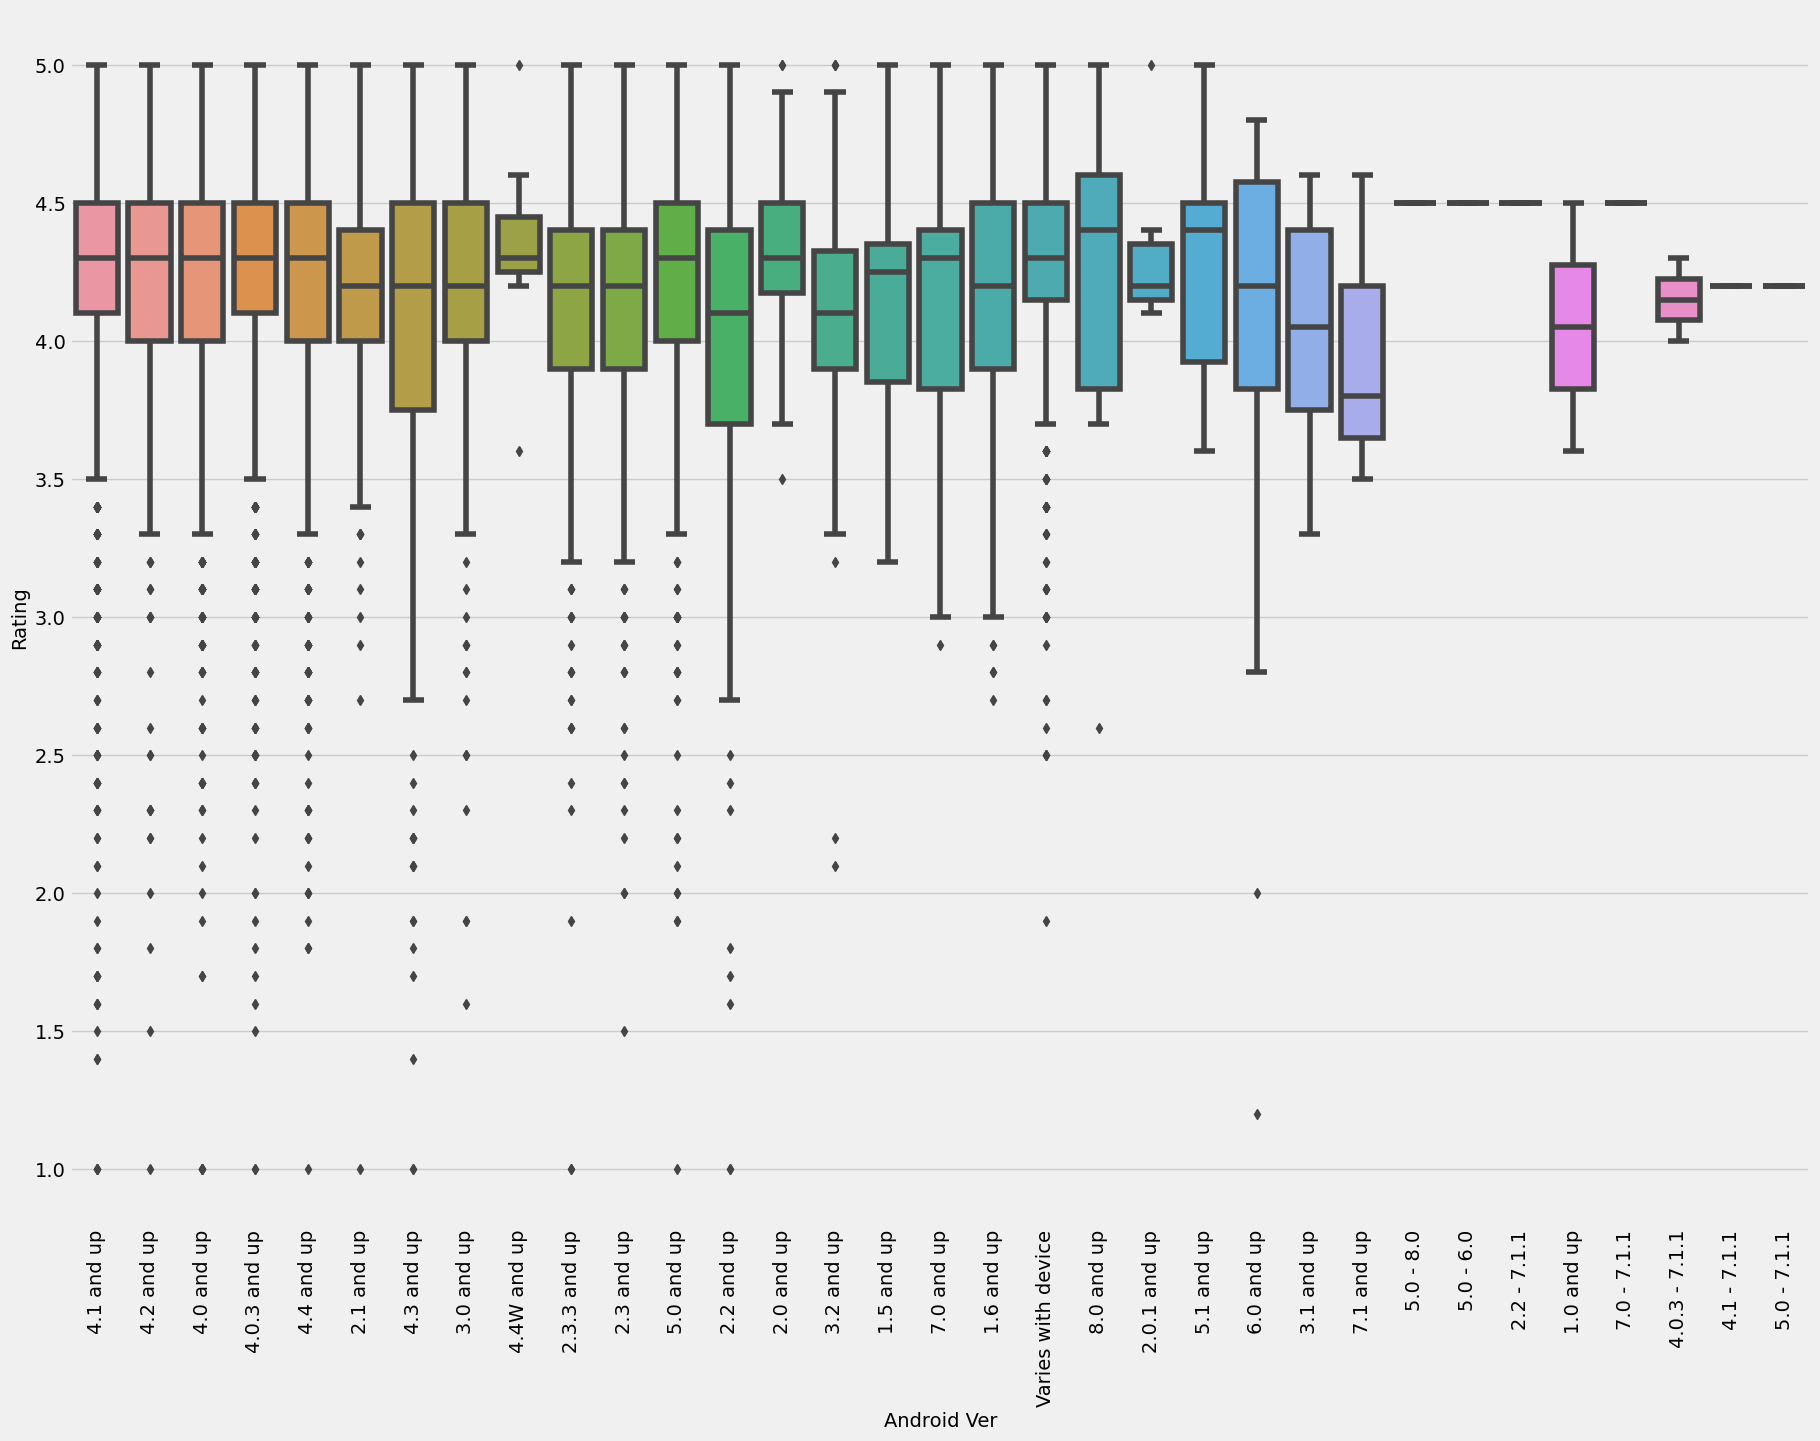

In [74]:
plt.figure(figsize=(20,15))
sns.boxplot(y='Rating',x='Android Ver',data = data.sort_values('Rating',ascending=False))
plt.xticks(rotation=90)

In [75]:
def violin(col):
    fig = px.violin(data, y=col, x="Type", color="Type", box=True , template = 'plotly_dark')
    return fig.show()

def scatters(col1,col2):
    fig = px.scatter(data, x=col1, y=col2, color="Type" ,template = 'plotly_dark')
    return fig.show()

def kde_plot(feature):
    grid = sns.FacetGrid(data, hue="Type",aspect=2)
    grid.map(sns.kdeplot, feature)
    grid.add_legend()

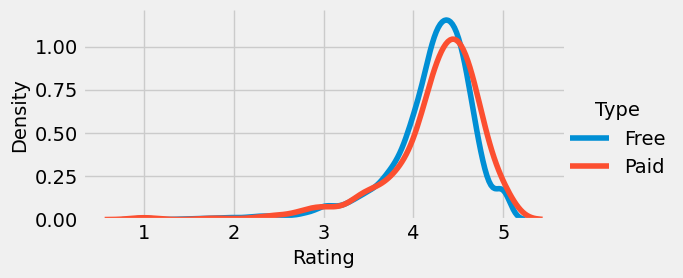

In [76]:
kde_plot('Rating')

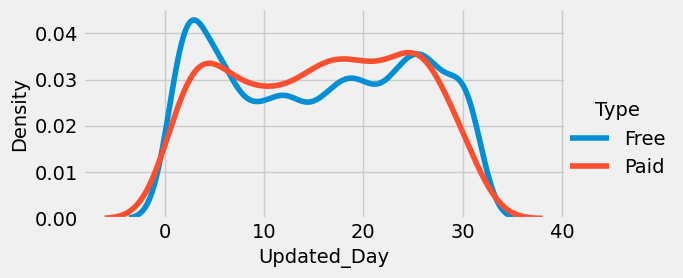

In [77]:
kde_plot('Updated_Day')

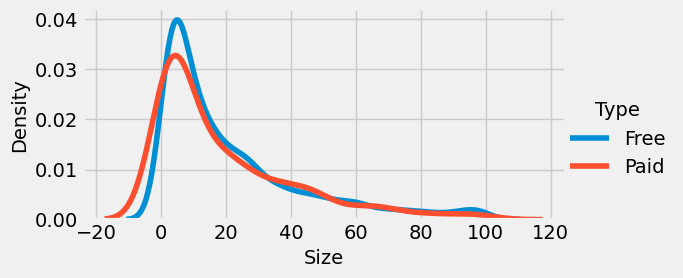

In [78]:
kde_plot('Size')

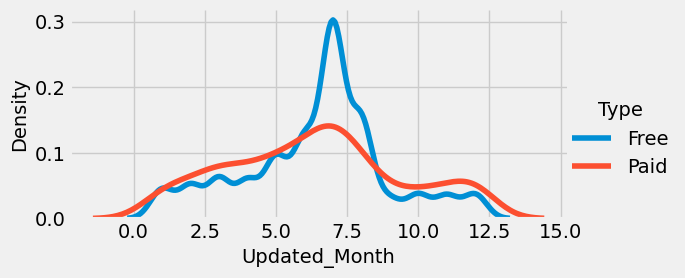

In [79]:
kde_plot('Updated_Month')

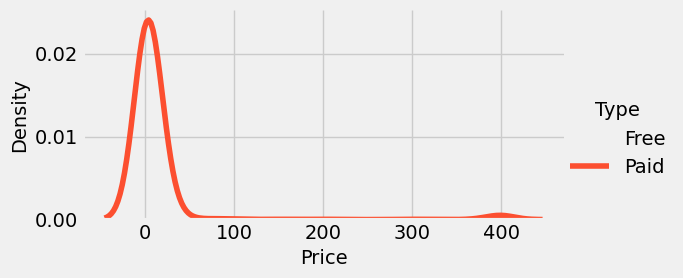

In [80]:
kde_plot('Price')

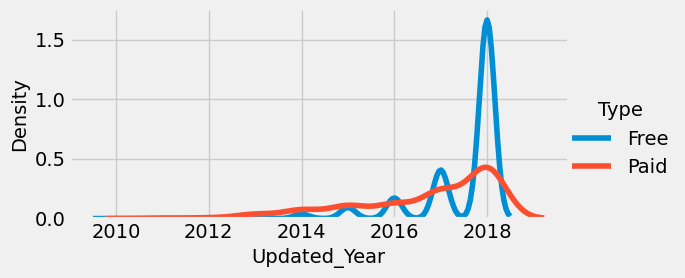

In [81]:
kde_plot('Updated_Year')

In [83]:
corelation = pd.DataFrame({'corelation' : data.corr()["Rating"].abs().sort_values(ascending=False)[1:]})
corelation

,corelation
Updated_Year,0.113669
Reviews,0.061973
Size,0.061127
Installs,0.047359
Price,0.021185
Updated_Month,0.018468
Updated_Day,0.010508


<Axes: >

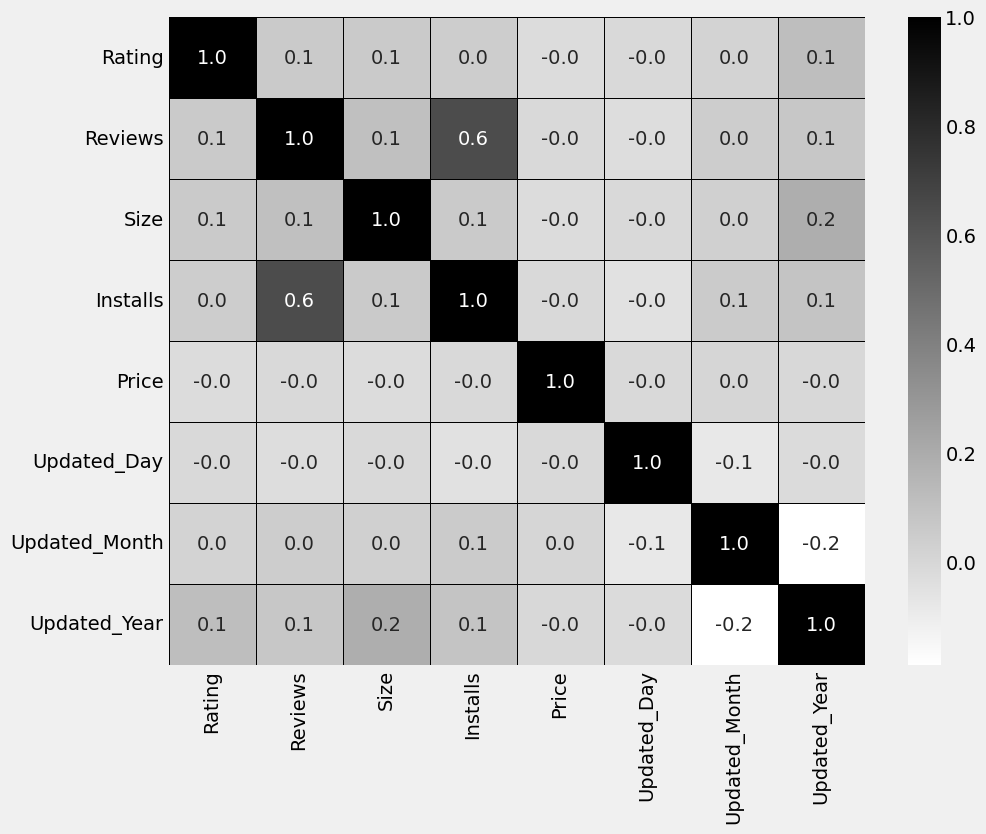

In [84]:
plt.figure(figsize=(10,8))
corelation = data.corr()
sns.heatmap(corelation,annot=True ,linewidths=0.5,linecolor="black", fmt= '.1f' ,cmap='gray_r')